# Implementation of a classifier for the ALeRCE broker

### 1. Data Curation using Pandas:

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [297]:
labels = pd.read_pickle("C:\dfcrossmatches_small.pickle")

In [298]:
labels

classALeRCE          ra        dec       period     source  \
oid                                                                       
ZTF18aaveffj         LPV  291.520423  21.930962          NaN  GAIADR2VS   
ZTF19aauyvnv         LPV  270.298238 -17.722810          NaN  GAIADR2VS   
ZTF18ablqvvc         RRL  271.180157  -6.556286          NaN  GAIADR2VS   
ZTF19abiblfd         RRL  268.188213 -17.161156          NaN  GAIADR2VS   
ZTF18acbvvku         AGN   48.110790  39.274936          NaN  MILLIQUAS   
...                  ...         ...        ...          ...        ...   
ZTF18aawgtde         QSO  235.612689  29.700747          NaN  MILLIQUAS   
ZTF18ablqnie         LPV  260.850159 -23.237702          NaN  GAIADR2VS   
ZTF19adcftsl         QSO  210.322714  22.715302          NaN  MILLIQUAS   
ZTF17aaaeblo         LPV   56.263632  56.318683  445.0268424  GAIADR2VS   
ZTF17aaawcpz       EB/EW    8.503472  38.867726    1.1774813     ASASSN   

                                 id_source class_source  separation_arcsec  
oid                                                                         
ZTF18aaveffj         2018953972876187648.0      MIRA_SR           0.067312  
ZTF19aauyvnv         4143774487177066496.0      MIRA_SR           0.062104  
ZTF18ablqvvc         4171403011041441792.0         RRAB           0.095138  
ZTF19abiblfd         4144758786310249984.0         RRAB           0.043913  
ZTF18acbvvku                      4C 39.11            A           0.055433  
...                                    ...          ...                ...  
ZTF18aawgtde               FBQS J1542+2942            Q           0.384536  
ZTF18ablqnie         4111611813625888768.0      MIRA_SR           0.228594  
ZTF19adcftsl     LAMOSTJ140117.45+224255.2            Q           0.067727  
ZTF17aaaeblo          445693502249299968.0      MIRA_SR           0.133420  
ZTF17aaawcpz  ASASSN-V J003400.84+385203.9           EB           0.160370  

[50000 rows x 8 columns]

In [299]:
classALeRCE = labels["classALeRCE"]

<AxesSubplot:>

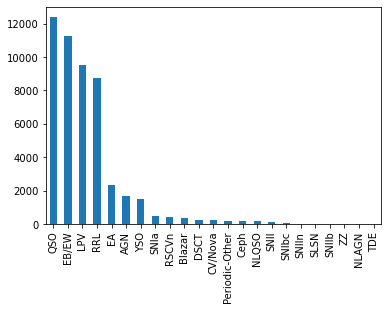

In [300]:
pd.value_counts(classALeRCE).plot.bar()

In [301]:
features = pd.read_pickle("C:\dsfeatures_small.pickle")

In [302]:
features

name     value  fid        version
oid                                                        
ZTF17aaaabrg        Amplitude  0.242504    1  feature_0.0.1
ZTF17aaaabrg        Amplitude  0.232499    2  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    1  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    2  feature_0.0.1
ZTF17aaaabrg   Autocor_length  1.000000    1  feature_0.0.1
...                       ...       ...  ...            ...
ZTF21abkylyc              Std  0.239856    2  feature_0.0.1
ZTF21abkylyc         StetsonK       NaN    1  feature_0.0.1
ZTF21abkylyc         StetsonK  0.886870    2  feature_0.0.1
ZTF21abkylyc            W1-W2       NaN    0  feature_0.0.1
ZTF21abkylyc            W2-W3       NaN    0  feature_0.0.1

[6739900 rows x 4 columns]

In [303]:
pivotfeatures = features.pivot(columns=["name","fid"], values="value")

In [304]:
pivotfeatures

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250       NaN        0.677959       NaN            1.0   
ZTF21abkndcw  0.617332       NaN        0.989514       NaN            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu       NaN  0.402185             NaN  1.000000            NaN   
ZTF21abkylyc       NaN  0.369650             NaN  0.576287            NaN   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  NaN   0.333333       NaN  0.0       NaN  ...       NaN   
ZTF21abkndcw  NaN   0.166667       NaN  0.0       NaN  ...       NaN   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0        NaN  0.322581  NaN  0.000000  ...  0.268336   
ZTF21abkylyc  1.0        NaN  0.250000  NaN  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511       NaN       NaN        NaN       NaN   
ZTF17aaaabtj  0.967987  0.758365       NaN       NaN        NaN       NaN   
ZTF17aaaacml  0.946447  0.786144       NaN       NaN        NaN       NaN   
ZTF17aaaacnc  0.525565  0.786877       NaN       NaN        NaN       NaN   
ZTF17aaaacnt  0.820105  0.772239       NaN       NaN        NaN       NaN   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906       NaN       NaN       NaN   0.000866       NaN   
ZTF21abkndcw  0.777093       NaN  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu       NaN  0.850610       NaN       NaN   0.002877       NaN   
ZTF21abkylyc       NaN  0.886870       NaN       NaN   0.184779       NaN   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg       NaN       NaN       NaN  
ZTF17aaaabtj       NaN       NaN       NaN  
ZTF17aaaacml       NaN       NaN       NaN  
ZTF17aaaacnc       NaN       NaN       NaN  
ZTF17aaaacnt       NaN       NaN       NaN  
...                ...       ...       ...  
ZTF21abkjyui       NaN       NaN       NaN  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu       NaN       NaN       NaN  
ZTF21abkylyc       NaN       NaN       NaN  

[39024 rows x 179 columns]

Recovering one element in the dataframe pivotfeatures using an specific name label (oid):

In [305]:
pivotfeatures.loc['ZTF17aaaabrg']

name             fid
Amplitude        1      0.242504
                 2      0.232499
AndersonDarling  1      1.000000
                 2      1.000000
Autocor_length   1      1.000000
                          ...   
Power_rate       12          NaN
r-W2             0           NaN
r-W3             0           NaN
W1-W2            0           NaN
W2-W3            0           NaN
Name: ZTF17aaaabrg, Length: 179, dtype: float64

In [306]:
pivotfeatures.median()

name             fid
Amplitude        1      0.402083
                 2      0.341036
AndersonDarling  1      0.999934
                 2      0.999747
Autocor_length   1      1.000000
                          ...   
Power_rate       12     0.029785
r-W2             0      4.645677
r-W3             0      7.501856
W1-W2            0      0.559000
W2-W3            0      2.527000
Length: 179, dtype: float64

In [307]:
pivotfeatures = pivotfeatures.fillna(pivotfeatures.median())

In [308]:
pivotfeatures

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250  0.341036        0.677959  0.999747            1.0   
ZTF21abkndcw  0.617332  0.341036        0.989514  0.999747            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu  0.402083  0.402185        0.999934  1.000000            1.0   
ZTF21abkylyc  0.402083  0.369650        0.999934  0.576287            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  1.0   0.333333  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abkndcw  1.0   0.166667  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0   0.329268  0.322581  0.0  0.000000  ...  0.268336   
ZTF21abkylyc  1.0   0.329268  0.250000  0.0  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaabtj  0.967987  0.758365  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacml  0.946447  0.786144  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnc  0.525565  0.786877  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnt  0.820105  0.772239  4.943869  7.820271   0.029785  4.645677   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906  0.825233  4.943869  7.820271   0.000866  4.645677   
ZTF21abkndcw  0.777093  0.825233  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu  0.834742  0.850610  4.943869  7.820271   0.002877  4.645677   
ZTF21abkylyc  0.834742  0.886870  4.943869  7.820271   0.184779  4.645677   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg  7.501856  0.559000  2.527000  
ZTF17aaaabtj  7.501856  0.559000  2.527000  
ZTF17aaaacml  7.501856  0.559000  2.527000  
ZTF17aaaacnc  7.501856  0.559000  2.527000  
ZTF17aaaacnt  7.501856  0.559000  2.527000  
...                ...       ...       ...  
ZTF21abkjyui  7.501856  0.559000  2.527000  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu  7.501856  0.559000  2.527000  
ZTF21abkylyc  7.501856  0.559000  2.527000  

[39024 rows x 179 columns]

In [309]:
dataframe = pd.concat([classALeRCE, pivotfeatures], axis=1)

In [310]:
dataframe

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF19abiblfd         RRL             NaN             NaN   
ZTF18acbvvku         AGN        0.849506        0.653158   
...                  ...             ...             ...   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF18ablqnie         LPV             NaN             NaN   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz       EB/EW        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF19abiblfd                   NaN                   NaN                  NaN   
ZTF18acbvvku              1.000000              1.000000                 12.0   
...                            ...                   ...                  ...   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF18ablqnie                   NaN                   NaN                  NaN   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF19abiblfd                  NaN              NaN              NaN       NaN   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
...                           ...              ...              ...       ...   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF18ablqnie                  NaN              NaN              NaN       NaN   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF19abiblfd  ...       NaN            NaN            NaN        NaN   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
...           ...       ...            ...            ...        ...   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF18ablqnie  ...       NaN            NaN            NaN        NaN   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

In [311]:
dataframe.columns

Index([         'classALeRCE',       ('Amplitude', 1),       ('Amplitude', 2),
       ('AndersonDarling', 1), ('AndersonDarling', 2),  ('Autocor_length', 1),
        ('Autocor_length', 2),      ('Beyond1Std', 1),      ('Beyond1Std', 2),
                   ('Con', 1),
       ...
                   ('Std', 2),        ('StetsonK', 1),        ('StetsonK', 2),
                  ('g-W2', 0),            ('g-W3', 0),     ('Power_rate', 12),
                  ('r-W2', 0),            ('r-W3', 0),           ('W1-W2', 0),
                 ('W2-W3', 0)],
      dtype='object', length=180)

In [312]:
dataframe.dropna(inplace=True)

In [313]:
dataframe

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF18acbvvku         AGN        0.849506        0.653158   
ZTF18acefhus         QSO        0.178364        0.192065   
...                  ...             ...             ...   
ZTF19aarauin         RRL        0.587070        0.565650   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz       EB/EW        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF18acbvvku              1.000000              1.000000                 12.0   
ZTF18acefhus              0.999954              0.999975                  5.0   
...                            ...                   ...                  ...   
ZTF19aarauin              0.999999              1.000000                  2.0   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
ZTF18acefhus                  6.0         0.294872         0.244898  0.000000   
...                           ...              ...              ...       ...   
ZTF19aarauin                  2.0         0.413793         0.351351  0.000000   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
ZTF18acefhus  ...  0.085607       0.739245       0.714789   4.943869   
...           ...       ...            ...            ...        ...   
ZTF19aarauin  ...  0.319543       0.888937       0.912618   4.943869   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

In [314]:
dataframe.columns

Index([         'classALeRCE',       ('Amplitude', 1),       ('Amplitude', 2),
       ('AndersonDarling', 1), ('AndersonDarling', 2),  ('Autocor_length', 1),
        ('Autocor_length', 2),      ('Beyond1Std', 1),      ('Beyond1Std', 2),
                   ('Con', 1),
       ...
                   ('Std', 2),        ('StetsonK', 1),        ('StetsonK', 2),
                  ('g-W2', 0),            ('g-W3', 0),     ('Power_rate', 12),
                  ('r-W2', 0),            ('r-W3', 0),           ('W1-W2', 0),
                 ('W2-W3', 0)],
      dtype='object', length=180)

In [315]:
pd.value_counts(dataframe["classALeRCE"])

LPV               8664
EB/EW             8600
QSO               8348
RRL               7592
EA                1754
AGN               1235
YSO                805
SNIa               504
Blazar             300
RSCVn              295
DSCT               210
CV/Nova            198
Periodic-Other     166
Ceph               134
SNII               106
SNIbc               40
NLQSO               38
SNIIn               12
SLSN                11
SNIIb                7
NLAGN                3
TDE                  2
Name: classALeRCE, dtype: int64

<AxesSubplot:>

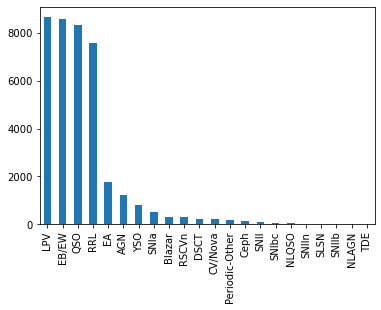

In [316]:
pd.value_counts(dataframe["classALeRCE"]).plot.bar()

In [317]:
dataframe = dataframe.replace({'EB/EW': 'EB', 'EA': 'EB'})

In [318]:
dataframe = dataframe.loc[-(dataframe.classALeRCE.isin(['NLQSO','NLAGN','ZZ','TDE']))]

In [319]:
dataframe

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF18acbvvku         AGN        0.849506        0.653158   
ZTF18acefhus         QSO        0.178364        0.192065   
...                  ...             ...             ...   
ZTF19aarauin         RRL        0.587070        0.565650   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz          EB        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF18acbvvku              1.000000              1.000000                 12.0   
ZTF18acefhus              0.999954              0.999975                  5.0   
...                            ...                   ...                  ...   
ZTF19aarauin              0.999999              1.000000                  2.0   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
ZTF18acefhus                  6.0         0.294872         0.244898  0.000000   
...                           ...              ...              ...       ...   
ZTF19aarauin                  2.0         0.413793         0.351351  0.000000   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
ZTF18acefhus  ...  0.085607       0.739245       0.714789   4.943869   
...           ...       ...            ...            ...        ...   
ZTF19aarauin  ...  0.319543       0.888937       0.912618   4.943869   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

In [320]:
y = dataframe["classALeRCE"].values

In [321]:
y

array(['LPV', 'LPV', 'RRL', ..., 'QSO', 'LPV', 'EB'], dtype=object)

In [322]:
dataf = dataframe

In [323]:
X = dataf.drop(['classALeRCE'], axis=1)

In [324]:
print("Design matrix shape:", X.shape)
print("Design matrix columns:", X.columns)

Design matrix shape: (38981, 179)
Design matrix columns: Index([      ('Amplitude', 1),       ('Amplitude', 2), ('AndersonDarling', 1),
       ('AndersonDarling', 2),  ('Autocor_length', 1),  ('Autocor_length', 2),
            ('Beyond1Std', 1),      ('Beyond1Std', 2),             ('Con', 1),
                   ('Con', 2),
       ...
                   ('Std', 2),        ('StetsonK', 1),        ('StetsonK', 2),
                  ('g-W2', 0),            ('g-W3', 0),     ('Power_rate', 12),
                  ('r-W2', 0),            ('r-W3', 0),           ('W1-W2', 0),
                 ('W2-W3', 0)],
      dtype='object', length=179)


In [325]:
X.head()

(Amplitude, 1)  (Amplitude, 2)  (AndersonDarling, 1)  \
oid                                                                  
ZTF18aaveffj        0.264278        0.363577              0.999210   
ZTF19aauyvnv        0.402083        0.341036              0.999934   
ZTF18ablqvvc        0.402083        0.100148              0.999934   
ZTF18acbvvku        0.849506        0.653158              1.000000   
ZTF18acefhus        0.178364        0.192065              0.999954   

              (AndersonDarling, 2)  (Autocor_length, 1)  (Autocor_length, 2)  \
oid                                                                            
ZTF18aaveffj              1.000000                  6.0                  6.0   
ZTF19aauyvnv              0.999747                  1.0                  1.0   
ZTF18ablqvvc              0.621504                  1.0                  1.0   
ZTF18acbvvku              1.000000                 12.0                  9.0   
ZTF18acefhus              0.999975                  5.0                  6.0   

              (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  (Con, 2)  ...  \
oid                                                                 ...   
ZTF18aaveffj         0.248276         0.442424  0.006993  0.030675  ...   
ZTF19aauyvnv         0.329268         0.325000  0.000000  0.000000  ...   
ZTF18ablqvvc         0.329268         0.266667  0.000000  0.000000  ...   
ZTF18acbvvku         0.404494         0.293103  0.000000  0.000000  ...   
ZTF18acefhus         0.294872         0.244898  0.000000  0.031250  ...   

              (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  (g-W3, 0)  \
oid                                                                          
ZTF18aaveffj  0.195895       0.808636       0.822968   4.943869   7.820271   
ZTF19aauyvnv  0.212839       0.834742       0.825233   4.943869   7.820271   
ZTF18ablqvvc  0.053437       0.834742       0.821775   4.943869   7.820271   
ZTF18acbvvku  0.405141       0.909260       0.886437   4.943869   7.820271   
ZTF18acefhus  0.085607       0.739245       0.714789   4.943869   7.820271   

              (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  (W2-W3, 0)  
oid                                                                           
ZTF18aaveffj          0.029785   4.645677   7.501856       0.559       2.527  
ZTF19aauyvnv          0.029785   4.645677   7.501856       0.559       2.527  
ZTF18ablqvvc          0.029785   4.645677   7.501856       0.559       2.527  
ZTF18acbvvku          0.029785   4.645677   7.501856       0.559       2.527  
ZTF18acefhus          0.029785   4.645677   7.501856       0.559       2.527  

[5 rows x 179 columns]

In [326]:
X.values

array([[0.26427794, 0.36357737, 0.99920955, ..., 7.50185617, 0.55900002,
        2.52699995],
       [0.40208292, 0.34103596, 0.99993437, ..., 7.50185617, 0.55900002,
        2.52699995],
       [0.40208292, 0.1001482 , 0.99993437, ..., 7.50185617, 0.55900002,
        2.52699995],
       ...,
       [0.18350983, 0.34103596, 0.80566424, ..., 8.93003845, 1.26500034,
        3.54500008],
       [2.30996966, 1.34745169, 1.        , ..., 7.50185617, 0.55900002,
        2.52699995],
       [0.62112665, 0.47960901, 0.97979935, ..., 7.50185617, 0.55900002,
        2.52699995]])

### 2. Visualize the Data:

In [327]:
pd.value_counts(dataframe["classALeRCE"])

EB                10354
LPV                8664
QSO                8348
RRL                7592
AGN                1235
YSO                 805
SNIa                504
Blazar              300
RSCVn               295
DSCT                210
CV/Nova             198
Periodic-Other      166
Ceph                134
SNII                106
SNIbc                40
SNIIn                12
SLSN                 11
SNIIb                 7
Name: classALeRCE, dtype: int64

We can see from the cell above that it is not possible to extract 10 random samples of objects of classALeRCE = SNIIb so for that category we are going to take all the 7 samples that are available only.

In [328]:
classes = pd.unique(dataframe["classALeRCE"])

In [329]:
df0 = dataframe.loc[dataframe.classALeRCE == classes[0]].sample(10).index.values
df1 = dataframe.loc[dataframe.classALeRCE == classes[1]].sample(10).index.values
df2 = dataframe.loc[dataframe.classALeRCE == classes[2]].sample(10).index.values
df3 = dataframe.loc[dataframe.classALeRCE == classes[3]].sample(10).index.values
df4 = dataframe.loc[dataframe.classALeRCE == classes[4]].sample(10).index.values
df5 = dataframe.loc[dataframe.classALeRCE == classes[5]].sample(10).index.values
df6 = dataframe.loc[dataframe.classALeRCE == classes[6]].sample(10).index.values
df7 = dataframe.loc[dataframe.classALeRCE == classes[7]].sample(10).index.values
df8 = dataframe.loc[dataframe.classALeRCE == classes[8]].sample(10).index.values
df9 = dataframe.loc[dataframe.classALeRCE == classes[9]].sample(10).index.values
df10 = dataframe.loc[dataframe.classALeRCE == classes[10]].sample(10).index.values
df11 = dataframe.loc[dataframe.classALeRCE == classes[11]].sample(10).index.values
df12 = dataframe.loc[dataframe.classALeRCE == classes[12]].sample(10).index.values
df13 = dataframe.loc[dataframe.classALeRCE == classes[13]].sample(10).index.values
df14 = dataframe.loc[dataframe.classALeRCE == classes[14]].sample(10).index.values
df15 = dataframe.loc[dataframe.classALeRCE == classes[15]].sample(10).index.values
df16 = dataframe.loc[dataframe.classALeRCE == classes[16]].sample(10).index.values
df17 = dataframe.loc[dataframe.classALeRCE == classes[17]].sample(7).index.values

In [330]:
from alerce.core import Alerce
alerce = Alerce()

In [331]:
lc01 = alerce.query_detections(df0[0],format="pandas")
lc02 = alerce.query_detections(df0[1],format="pandas")
lc03 = alerce.query_detections(df0[2],format="pandas")
lc04 = alerce.query_detections(df0[3],format="pandas")
lc05 = alerce.query_detections(df0[4],format="pandas")
lc06 = alerce.query_detections(df0[5],format="pandas")
lc07 = alerce.query_detections(df0[6],format="pandas")
lc08 = alerce.query_detections(df0[7],format="pandas")
lc09 = alerce.query_detections(df0[8],format="pandas")
lc010 = alerce.query_detections(df0[9],format="pandas")

In [332]:
lc01

tid           mjd               candid  fid            pid  diffmaglim  \
0    ztf  58323.401134   569401135815015023    1   569401135815   20.105886   
1    ztf  58326.431019   572431015815025024    1   572431015815   19.016600   
2    ztf  58332.235370   578235375815015025    1   578235375815   21.093960   
3    ztf  58338.362974   584362975815015029    1   584362975815   20.825096   
4    ztf  58344.312326   590312325815015012    2   590312325815   20.537200   
..   ...           ...                  ...  ...            ...         ...   
536  ztf  59881.129873  2127129875815015028    1  2127129875815   20.446500   
537  ztf  59881.239931  2127239935815015021    2  2127239935815   19.772100   
538  ztf  59883.122106  2129122105815015025    2  2129122105815   20.283600   
539  ztf  59883.165174  2129165175815015037    1  2129165175815   19.938600   
540  ztf  59888.109931  2134109935815015043    2  2134109935815   18.745914   

     isdiffpos   nid    distnr     magpsf  ...       drb  magapbig  \
0            1   569  0.196566  16.527680  ...  0.000000   16.6092   
1            1   572  0.204291  16.752600  ...       NaN   16.7348   
2            1   578  0.191730  16.840746  ...  0.000000   16.8945   
3            1   584  0.177013  17.069206  ...  0.000000   17.1335   
4            1   590  0.199986  15.018900  ...       NaN   14.8801   
..         ...   ...       ...        ...  ...       ...       ...   
536          1  2127  0.190927  15.479400  ...       NaN   15.5081   
537          1  2127  0.314095  13.100000  ...       NaN   13.1649   
538          1  2129  0.117593  12.984800  ...       NaN   13.0394   
539          1  2129  0.201958  15.212981  ...  0.999999   15.2658   
540          1  2134  0.217525  12.596993  ...  0.999199   12.6406   

     sigmagapbig         rfid  has_stamp  corrected  dubious  step_id_corr  \
0         0.0215  541120158.0      False       True    False    bulk_1.0.0   
1         0.0603          NaN      False       True    False    bulk_1.0.0   
2         0.0148  541120158.0      False       True    False    bulk_1.0.0   
3         0.0204  541120158.0      False       True    False    bulk_1.0.0   
4         0.0061          NaN      False       True    False    bulk_1.0.0   
..           ...          ...        ...        ...      ...           ...   
536       0.0067          NaN      False       True    False         1.1.6   
537       0.0021          NaN      False       True    False         1.1.6   
538       0.0017          NaN      False       True    False         1.1.6   
539       0.0073  541120158.0       True       True    False         1.1.6   
540       0.0019  541120258.0       True       True    False         1.1.6   

     phase parent_candid  
0      0.0  5.972112e+17  
1      0.0  5.972112e+17  
2      0.0  5.972112e+17  
3      0.0  5.972112e+17  
4      0.0  6.152308e+17  
..     ...           ...  
536    0.0  2.129165e+18  
537    0.0  2.129165e+18  
538    0.0  2.129165e+18  
539    0.0           NaN  
540    0.0           NaN  

[541 rows x 30 columns]

As we can see from the table above, we are goind to use the data of the columns 'magpsf' (Magnitude Point Spread Function) and 'mjd' (Modified Julian Date) to plot the lightcurve for each sample (Magnitude vs. Time) with MJD in the X axis and Mag in the Y axis.

In [333]:
classes[0]

'LPV'

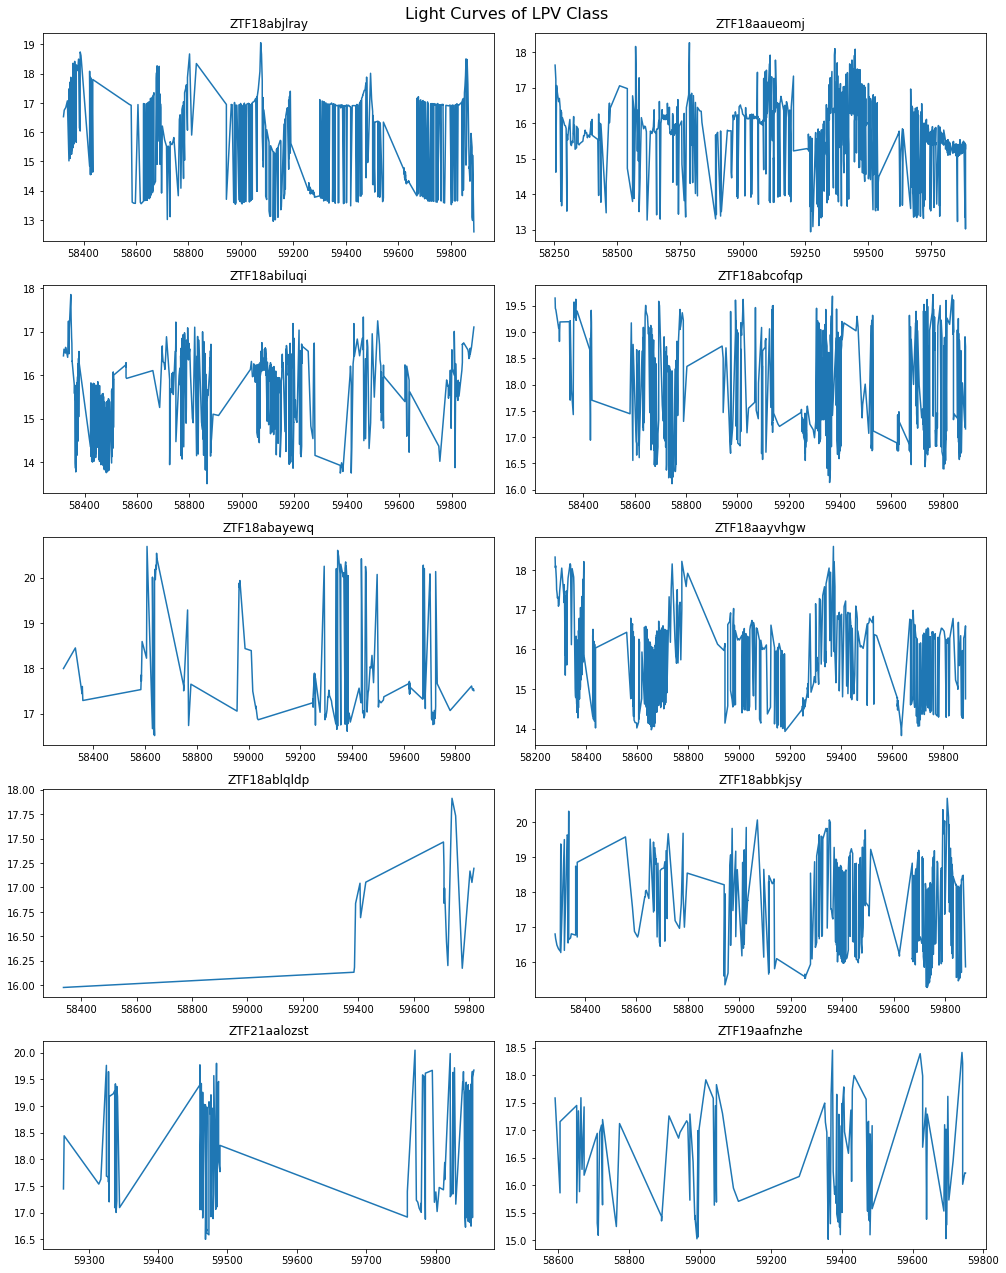

In [334]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of LPV Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df0[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df0[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df0[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df0[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df0[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df0[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df0[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df0[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df0[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df0[9])

fig.tight_layout()

In [335]:
classes[1]

'RRL'

In [336]:
lc01 = alerce.query_detections(df1[0],format="pandas")
lc02 = alerce.query_detections(df1[1],format="pandas")
lc03 = alerce.query_detections(df1[2],format="pandas")
lc04 = alerce.query_detections(df1[3],format="pandas")
lc05 = alerce.query_detections(df1[4],format="pandas")
lc06 = alerce.query_detections(df1[5],format="pandas")
lc07 = alerce.query_detections(df1[6],format="pandas")
lc08 = alerce.query_detections(df1[7],format="pandas")
lc09 = alerce.query_detections(df1[8],format="pandas")
lc010 = alerce.query_detections(df1[9],format="pandas")

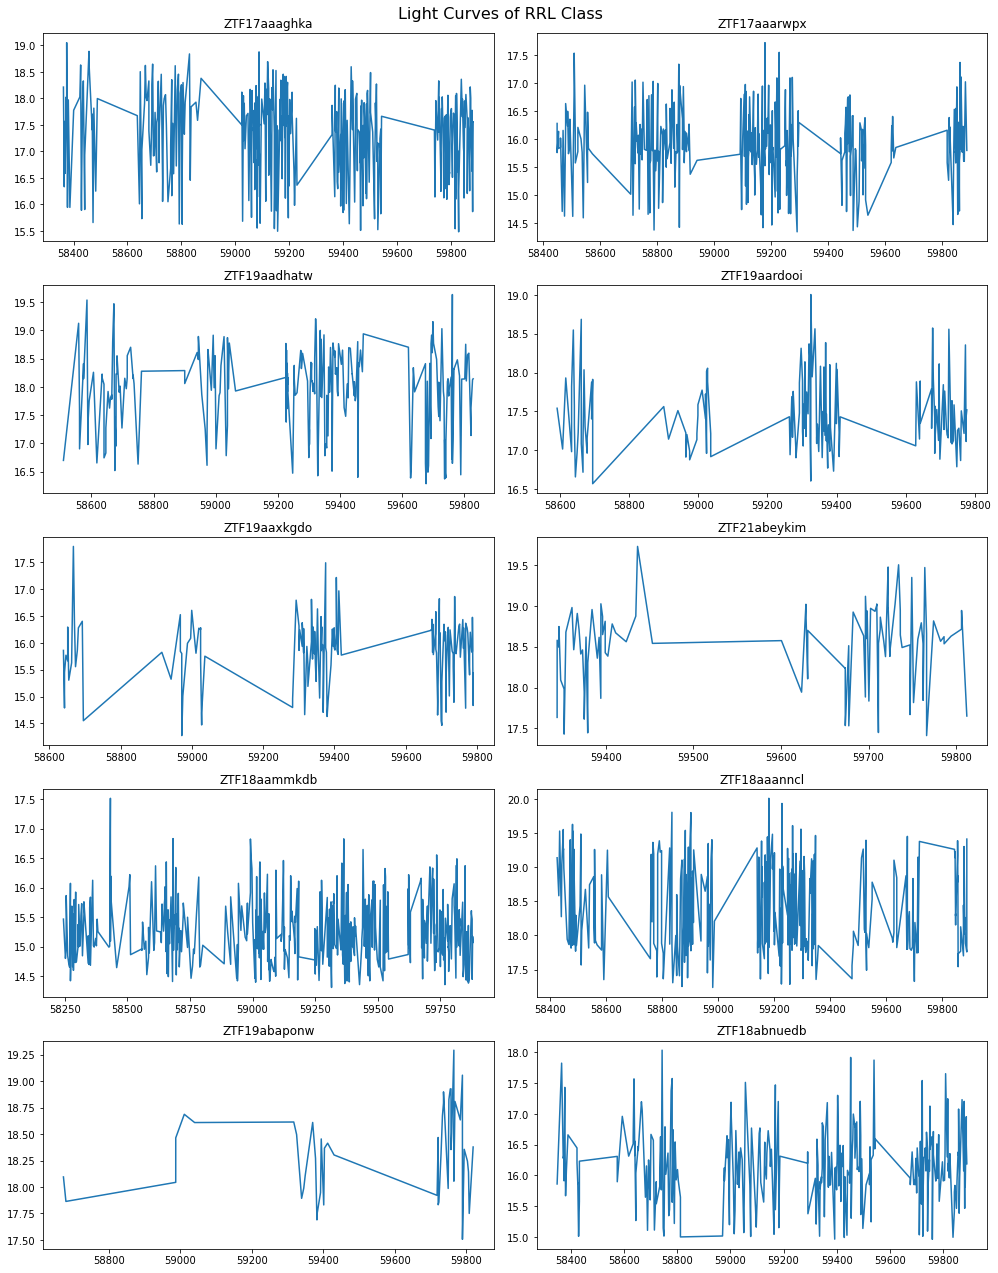

In [337]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of RRL Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df1[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df1[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df1[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df1[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df1[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df1[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df1[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df1[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df1[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df1[9])

fig.tight_layout()

In [338]:
classes[2]

'AGN'

In [339]:
lc01 = alerce.query_detections(df2[0],format="pandas")
lc02 = alerce.query_detections(df2[1],format="pandas")
lc03 = alerce.query_detections(df2[2],format="pandas")
lc04 = alerce.query_detections(df2[3],format="pandas")
lc05 = alerce.query_detections(df2[4],format="pandas")
lc06 = alerce.query_detections(df2[5],format="pandas")
lc07 = alerce.query_detections(df2[6],format="pandas")
lc08 = alerce.query_detections(df2[7],format="pandas")
lc09 = alerce.query_detections(df2[8],format="pandas")
lc010 = alerce.query_detections(df2[9],format="pandas")

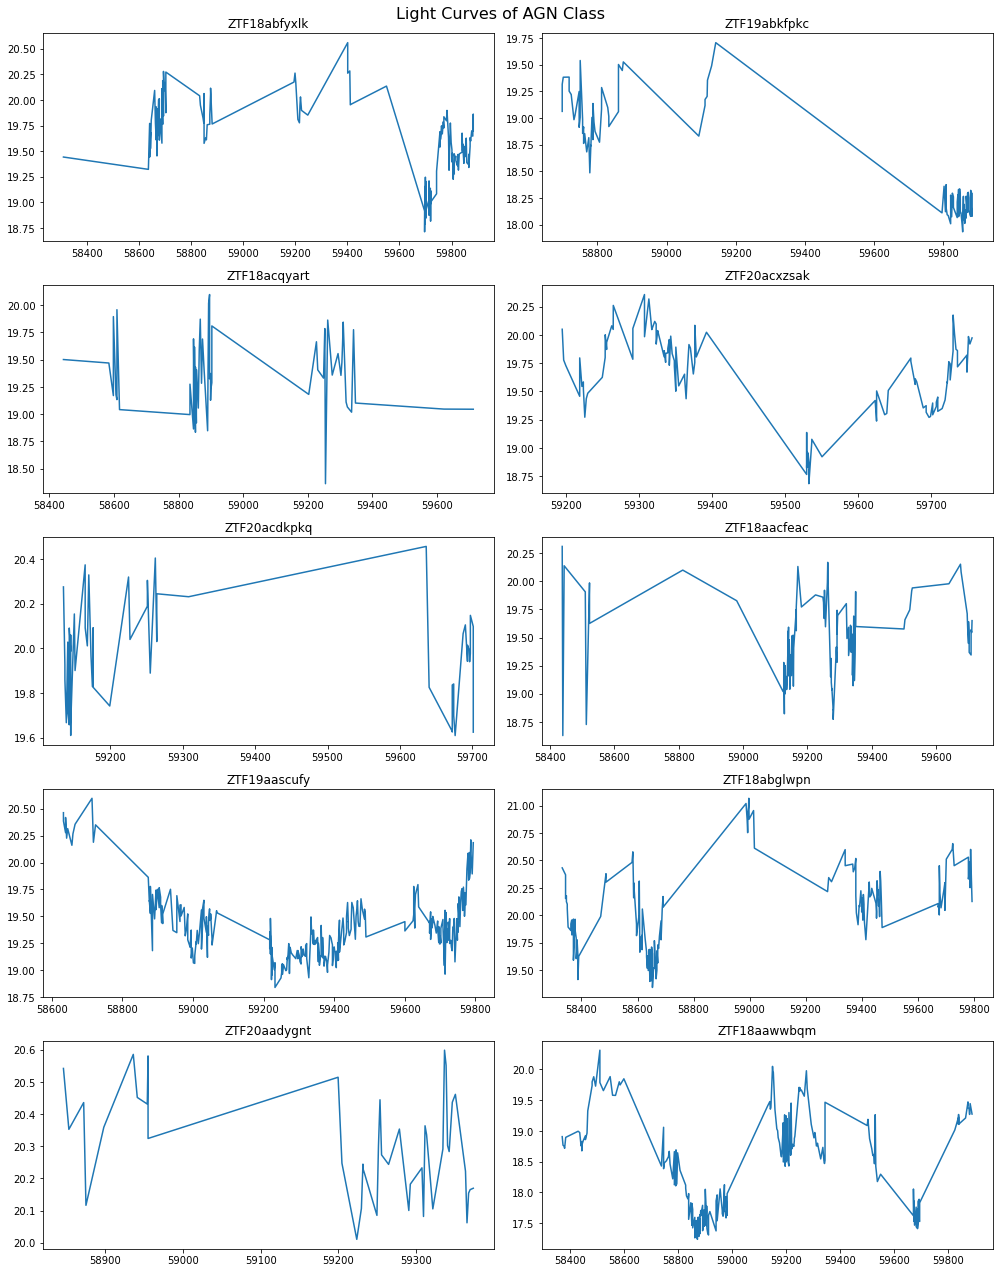

In [340]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of AGN Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df2[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df2[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df2[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df2[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df2[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df2[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df2[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df2[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df2[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df2[9])

fig.tight_layout()

In [341]:
classes[3]

'QSO'

In [342]:
lc01 = alerce.query_detections(df3[0],format="pandas")
lc02 = alerce.query_detections(df3[1],format="pandas")
lc03 = alerce.query_detections(df3[2],format="pandas")
lc04 = alerce.query_detections(df3[3],format="pandas")
lc05 = alerce.query_detections(df3[4],format="pandas")
lc06 = alerce.query_detections(df3[5],format="pandas")
lc07 = alerce.query_detections(df3[6],format="pandas")
lc08 = alerce.query_detections(df3[7],format="pandas")
lc09 = alerce.query_detections(df3[8],format="pandas")
lc010 = alerce.query_detections(df3[9],format="pandas")

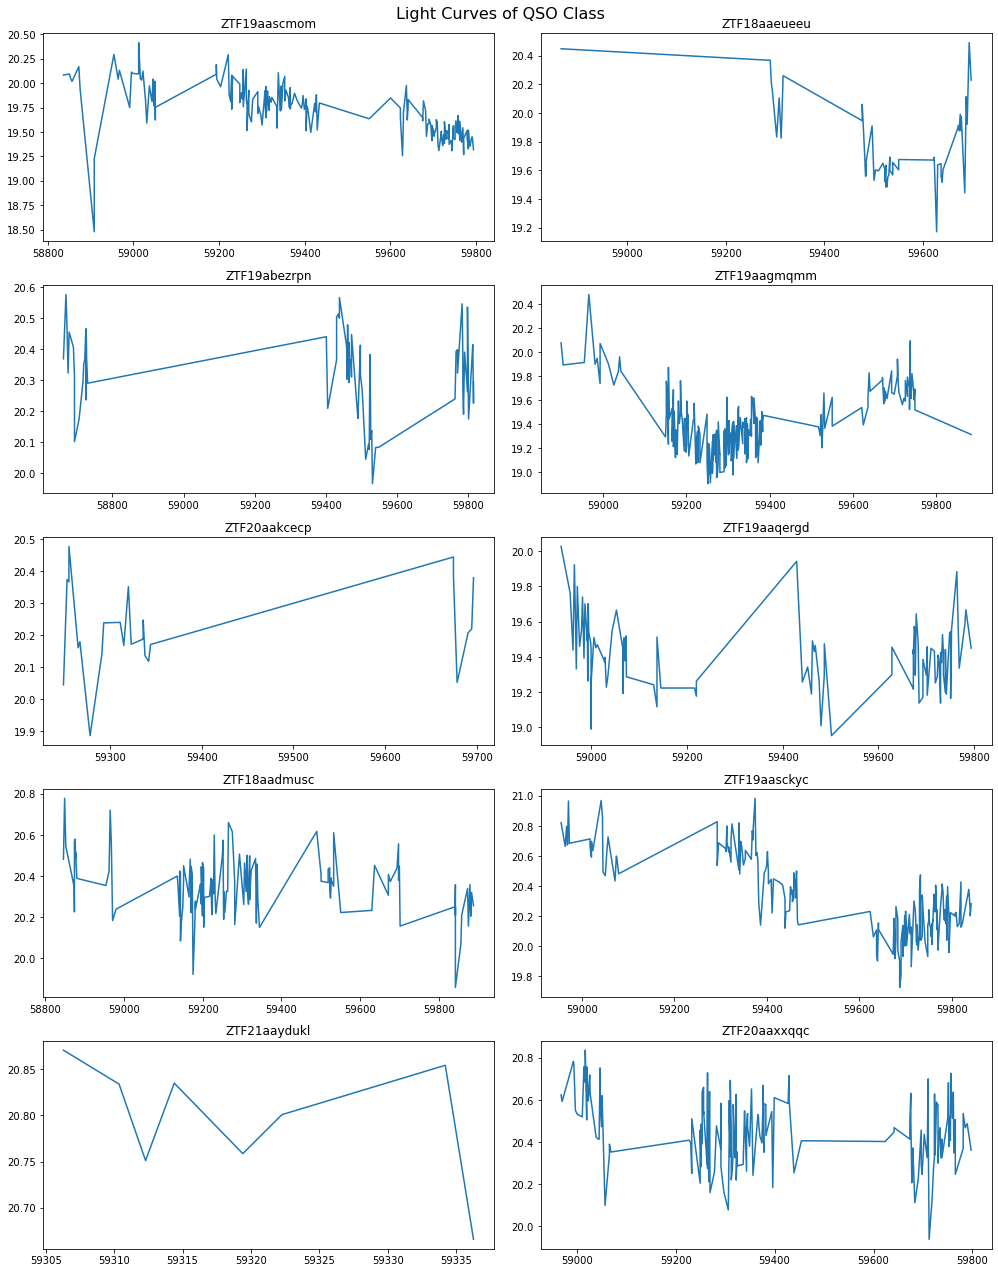

In [343]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of QSO Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df3[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df3[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df3[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df3[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df3[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df3[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df3[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df3[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df3[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df3[9])

fig.tight_layout()

In [344]:
classes[4]

'EB'

In [345]:
lc01 = alerce.query_detections(df4[0],format="pandas")
lc02 = alerce.query_detections(df4[1],format="pandas")
lc03 = alerce.query_detections(df4[2],format="pandas")
lc04 = alerce.query_detections(df4[3],format="pandas")
lc05 = alerce.query_detections(df4[4],format="pandas")
lc06 = alerce.query_detections(df4[5],format="pandas")
lc07 = alerce.query_detections(df4[6],format="pandas")
lc08 = alerce.query_detections(df4[7],format="pandas")
lc09 = alerce.query_detections(df4[8],format="pandas")
lc010 = alerce.query_detections(df4[9],format="pandas")

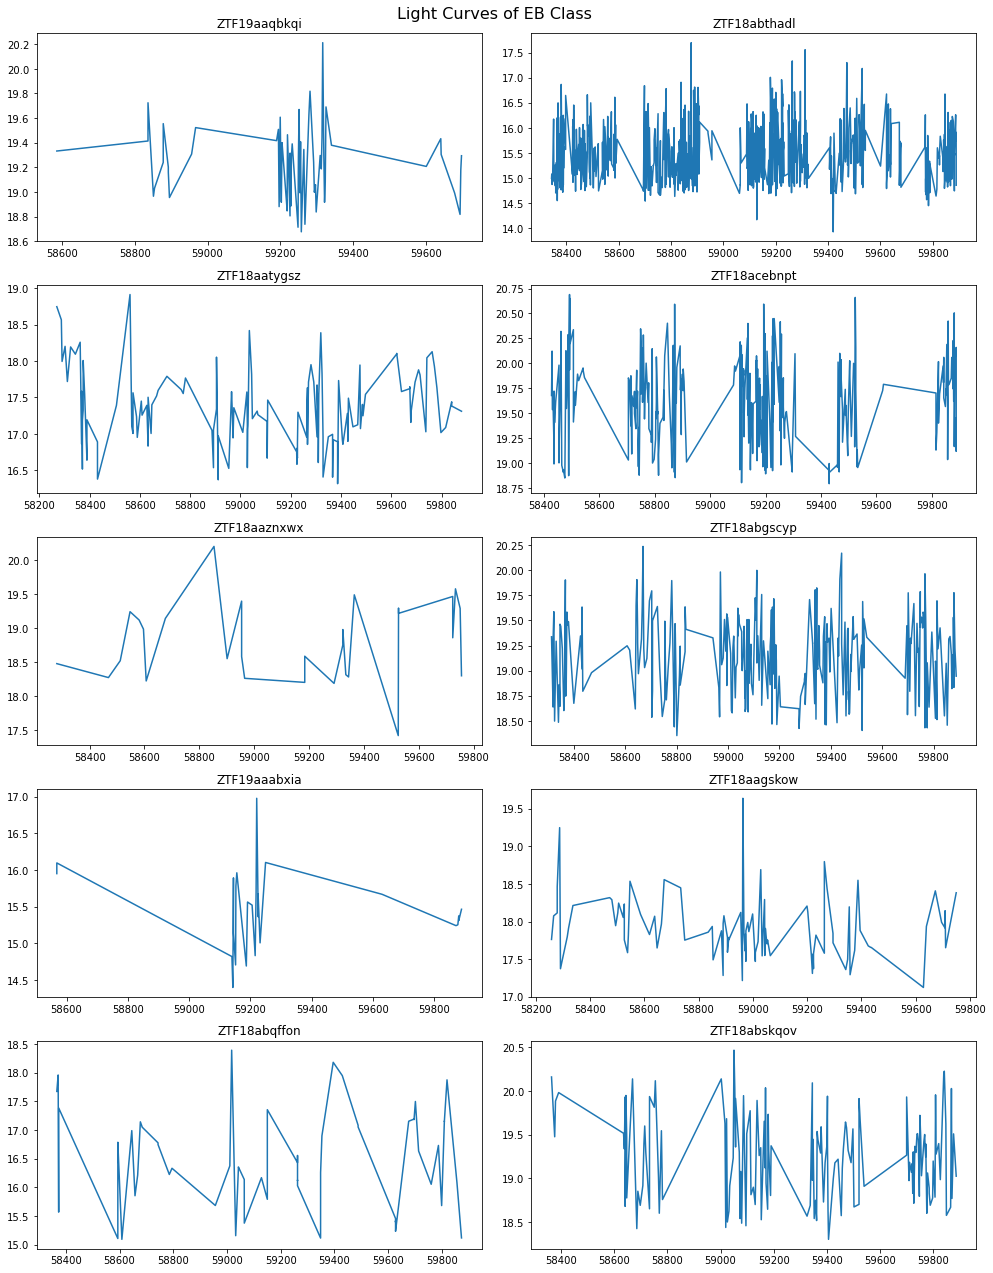

In [346]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of EB Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df4[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df4[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df4[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df4[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df4[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df4[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df4[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df4[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df4[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df4[9])

fig.tight_layout()

In [347]:
classes[5]

'YSO'

In [348]:
lc01 = alerce.query_detections(df5[0],format="pandas")
lc02 = alerce.query_detections(df5[1],format="pandas")
lc03 = alerce.query_detections(df5[2],format="pandas")
lc04 = alerce.query_detections(df5[3],format="pandas")
lc05 = alerce.query_detections(df5[4],format="pandas")
lc06 = alerce.query_detections(df5[5],format="pandas")
lc07 = alerce.query_detections(df5[6],format="pandas")
lc08 = alerce.query_detections(df5[7],format="pandas")
lc09 = alerce.query_detections(df5[8],format="pandas")
lc010 = alerce.query_detections(df5[9],format="pandas")

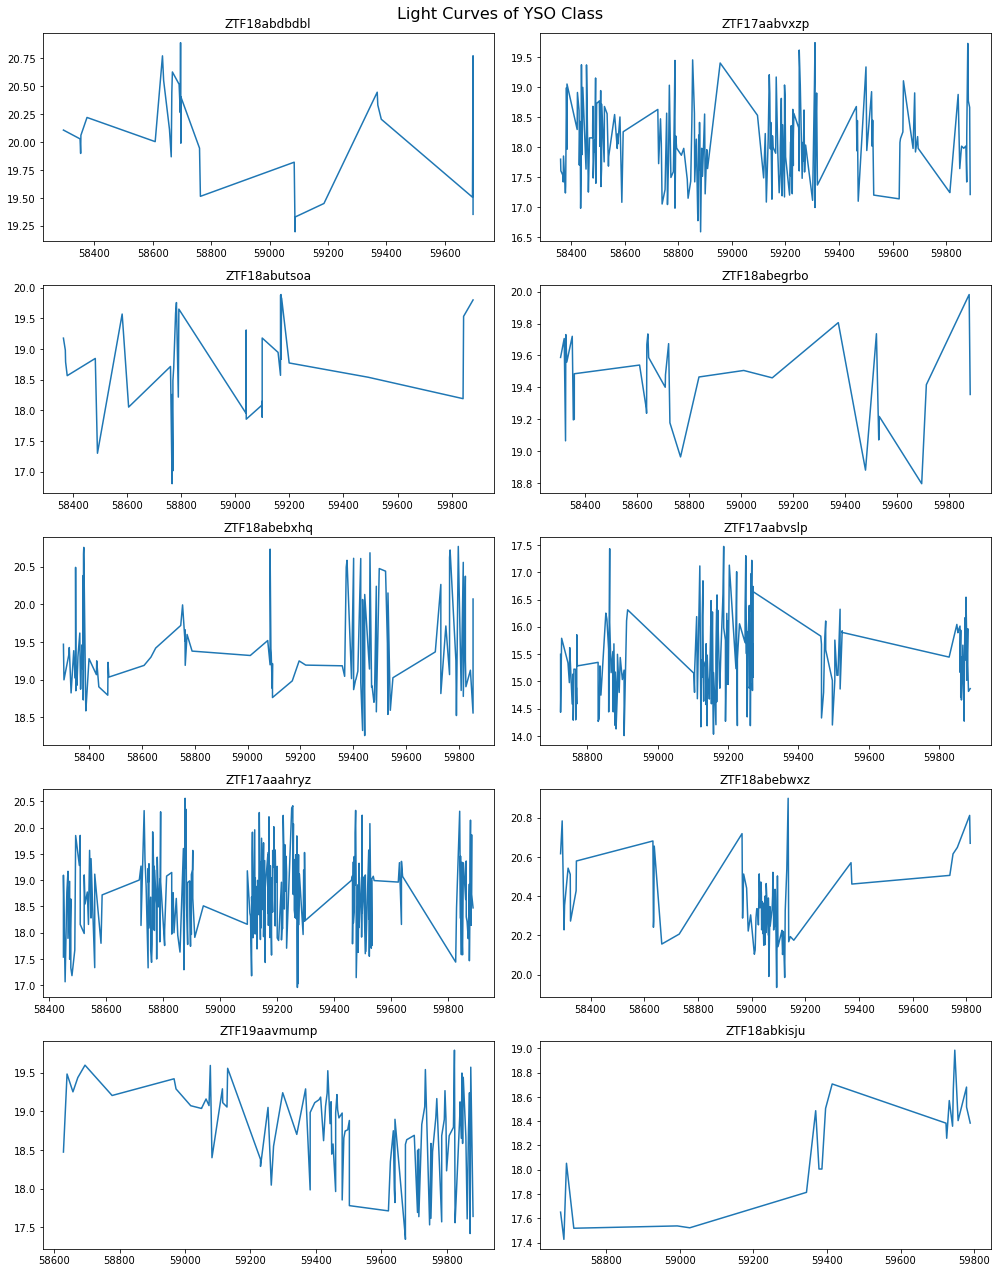

In [349]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of YSO Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df5[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df5[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df5[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df5[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df5[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df5[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df5[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df5[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df5[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df5[9])

fig.tight_layout()

In [350]:
classes[6]

'Blazar'

In [351]:
lc01 = alerce.query_detections(df6[0],format="pandas")
lc02 = alerce.query_detections(df6[1],format="pandas")
lc03 = alerce.query_detections(df6[2],format="pandas")
lc04 = alerce.query_detections(df6[3],format="pandas")
lc05 = alerce.query_detections(df6[4],format="pandas")
lc06 = alerce.query_detections(df6[5],format="pandas")
lc07 = alerce.query_detections(df6[6],format="pandas")
lc08 = alerce.query_detections(df6[7],format="pandas")
lc09 = alerce.query_detections(df6[8],format="pandas")
lc010 = alerce.query_detections(df6[9],format="pandas")

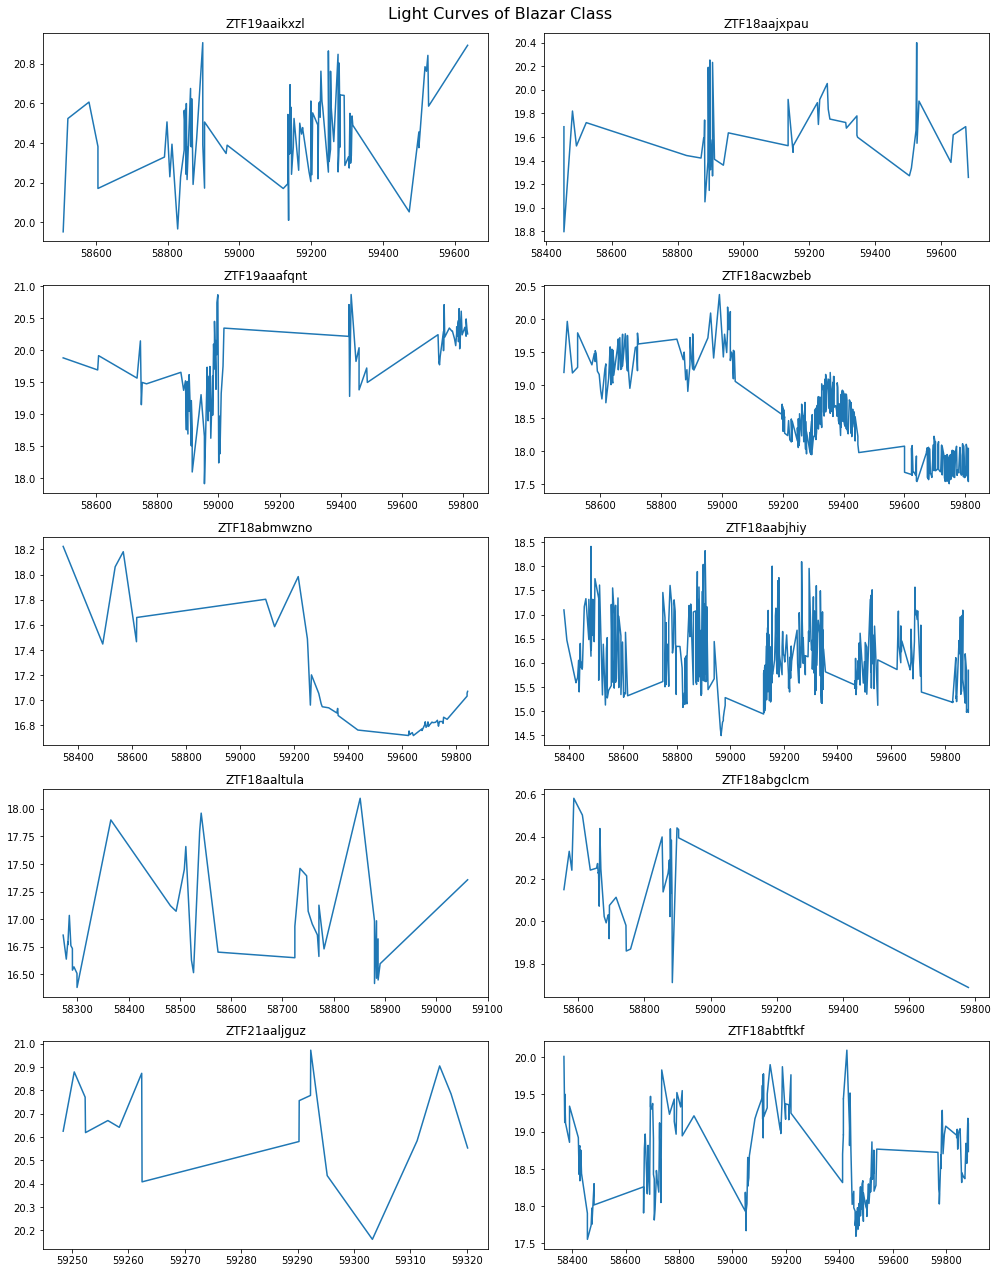

In [352]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of Blazar Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df6[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df6[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df6[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df6[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df6[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df6[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df6[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df6[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df6[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df6[9])

fig.tight_layout()

In [353]:
classes[7]

'RSCVn'

In [354]:
lc01 = alerce.query_detections(df7[0],format="pandas")
lc02 = alerce.query_detections(df7[1],format="pandas")
lc03 = alerce.query_detections(df7[2],format="pandas")
lc04 = alerce.query_detections(df7[3],format="pandas")
lc05 = alerce.query_detections(df7[4],format="pandas")
lc06 = alerce.query_detections(df7[5],format="pandas")
lc07 = alerce.query_detections(df7[6],format="pandas")
lc08 = alerce.query_detections(df7[7],format="pandas")
lc09 = alerce.query_detections(df7[8],format="pandas")
lc010 = alerce.query_detections(df7[9],format="pandas")

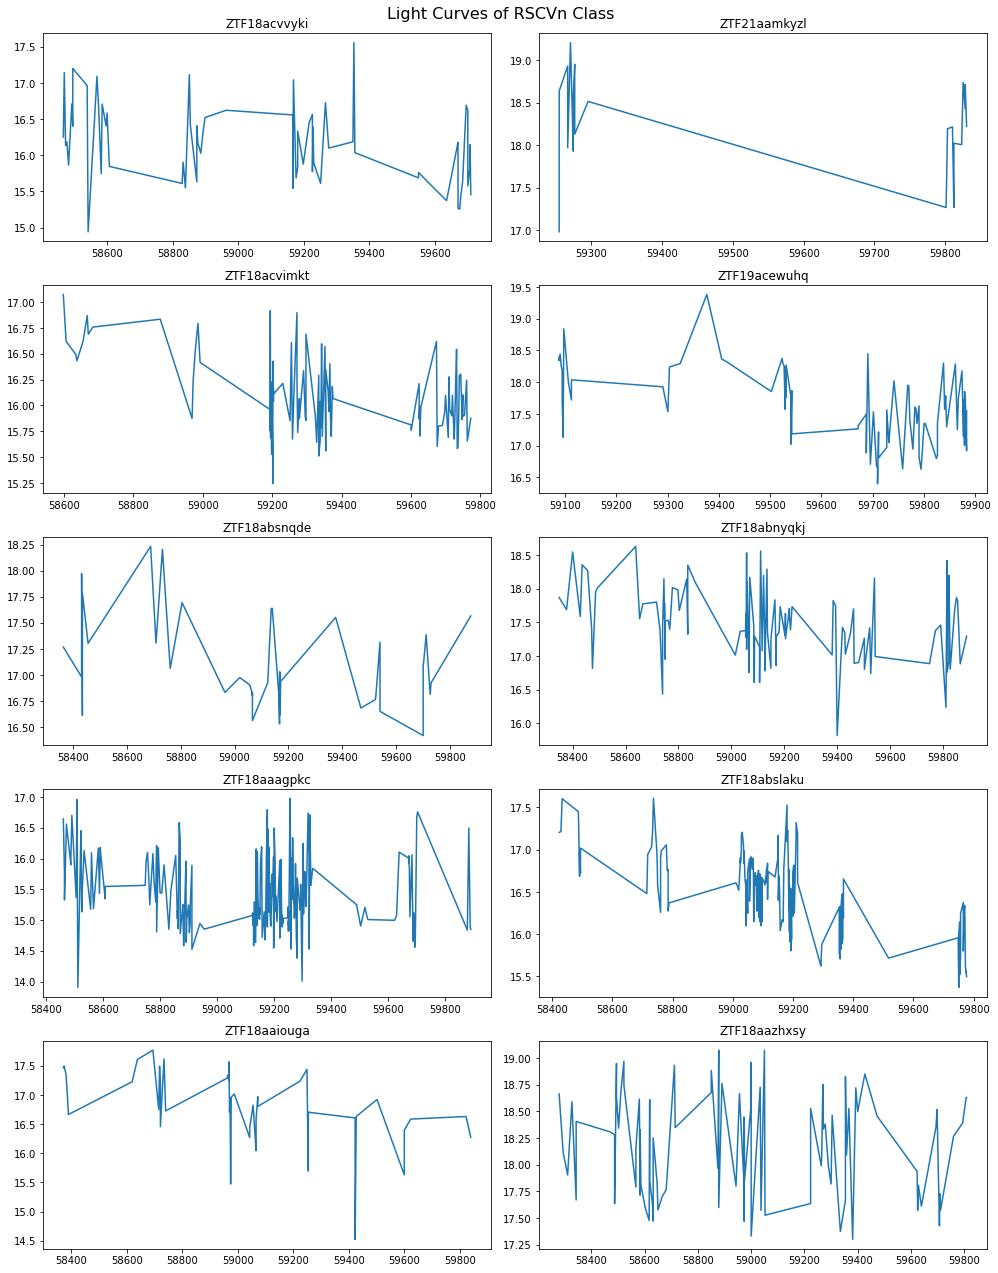

In [355]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of RSCVn Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df7[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df7[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df7[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df7[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df7[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df7[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df7[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df7[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df7[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df7[9])

fig.tight_layout()

In [356]:
classes[8]

'DSCT'

In [357]:
lc01 = alerce.query_detections(df8[0],format="pandas")
lc02 = alerce.query_detections(df8[1],format="pandas")
lc03 = alerce.query_detections(df8[2],format="pandas")
lc04 = alerce.query_detections(df8[3],format="pandas")
lc05 = alerce.query_detections(df8[4],format="pandas")
lc06 = alerce.query_detections(df8[5],format="pandas")
lc07 = alerce.query_detections(df8[6],format="pandas")
lc08 = alerce.query_detections(df8[7],format="pandas")
lc09 = alerce.query_detections(df8[8],format="pandas")
lc010 = alerce.query_detections(df8[9],format="pandas")

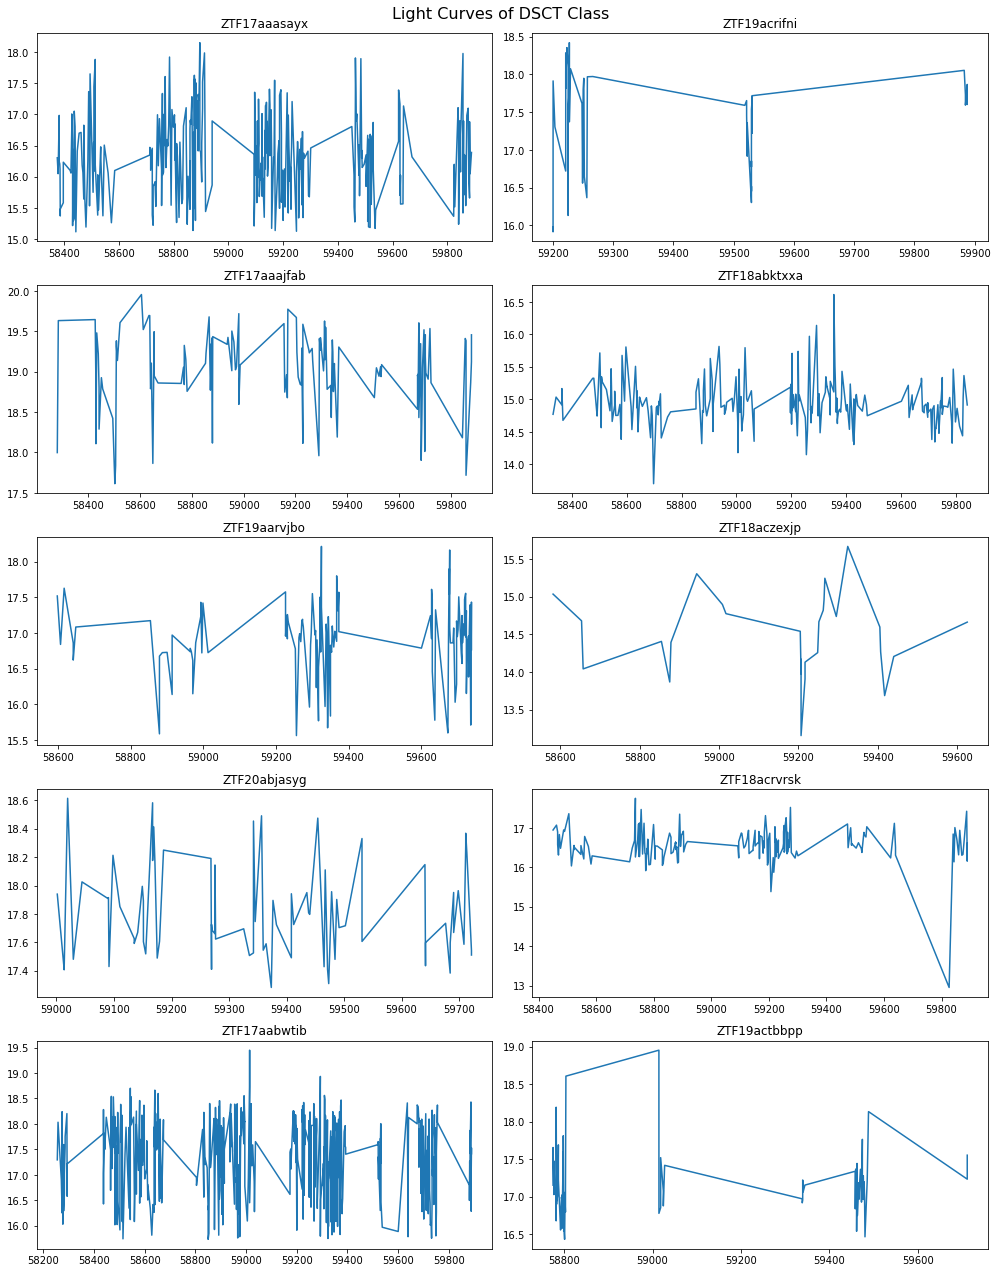

In [358]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of DSCT Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df8[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df8[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df8[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df8[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df8[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df8[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df8[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df8[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df8[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df8[9])

fig.tight_layout()

In [359]:
classes[9]

'Ceph'

In [360]:
lc01 = alerce.query_detections(df9[0],format="pandas")
lc02 = alerce.query_detections(df9[1],format="pandas")
lc03 = alerce.query_detections(df9[2],format="pandas")
lc04 = alerce.query_detections(df9[3],format="pandas")
lc05 = alerce.query_detections(df9[4],format="pandas")
lc06 = alerce.query_detections(df9[5],format="pandas")
lc07 = alerce.query_detections(df9[6],format="pandas")
lc08 = alerce.query_detections(df9[7],format="pandas")
lc09 = alerce.query_detections(df9[8],format="pandas")
lc010 = alerce.query_detections(df9[9],format="pandas")

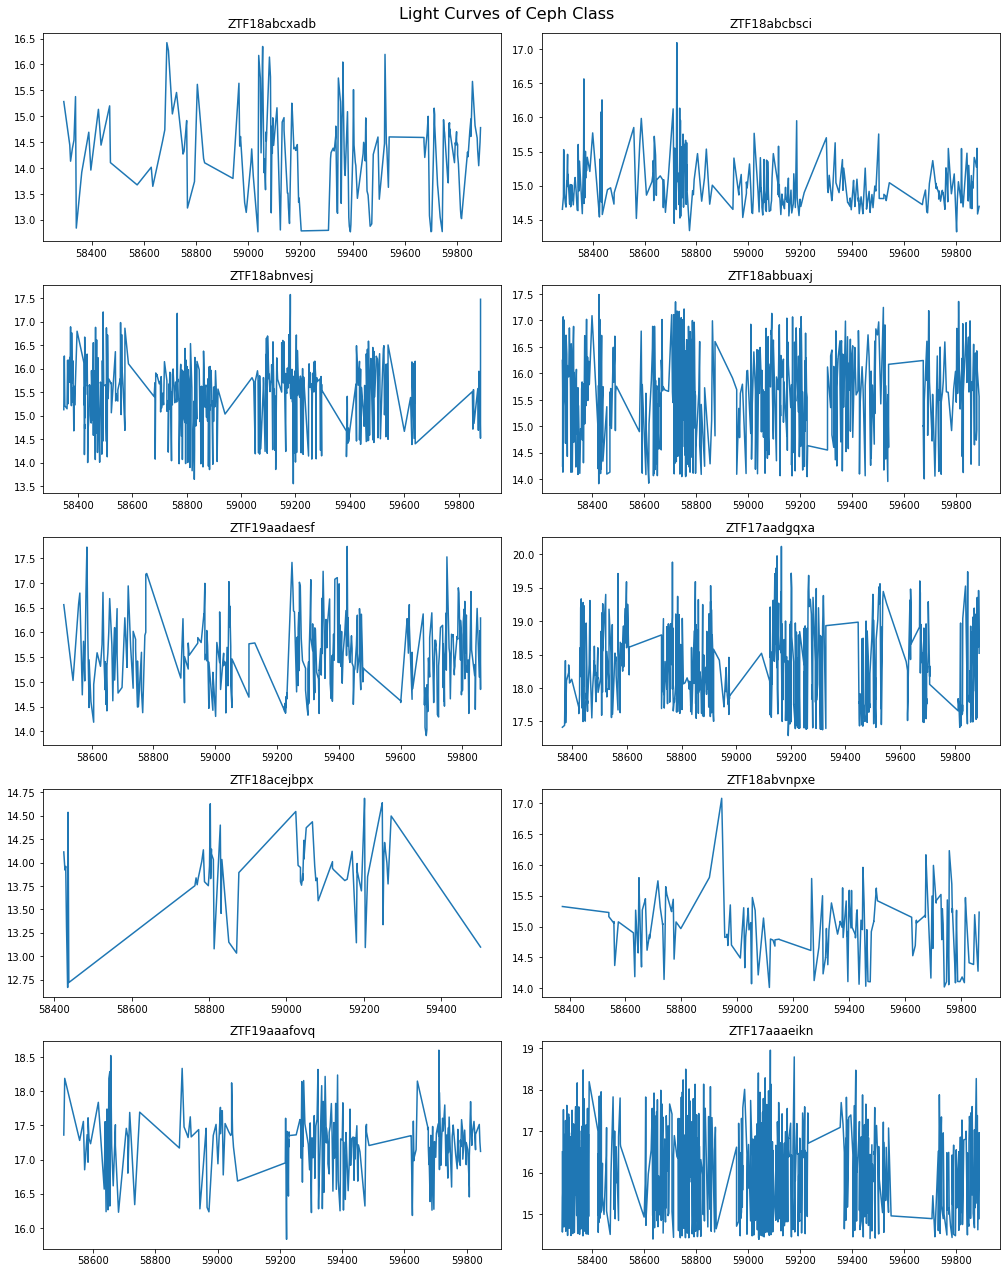

In [361]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of Ceph Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df9[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df9[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df9[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df9[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df9[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df9[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df9[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df9[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df9[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df9[9])

fig.tight_layout()

In [362]:
classes[10]

'SNIa'

In [363]:
lc01 = alerce.query_detections(df10[0],format="pandas")
lc02 = alerce.query_detections(df10[1],format="pandas")
lc03 = alerce.query_detections(df10[2],format="pandas")
lc04 = alerce.query_detections(df10[3],format="pandas")
lc05 = alerce.query_detections(df10[4],format="pandas")
lc06 = alerce.query_detections(df10[5],format="pandas")
lc07 = alerce.query_detections(df10[6],format="pandas")
lc08 = alerce.query_detections(df10[7],format="pandas")
lc09 = alerce.query_detections(df10[8],format="pandas")
lc010 = alerce.query_detections(df10[9],format="pandas")

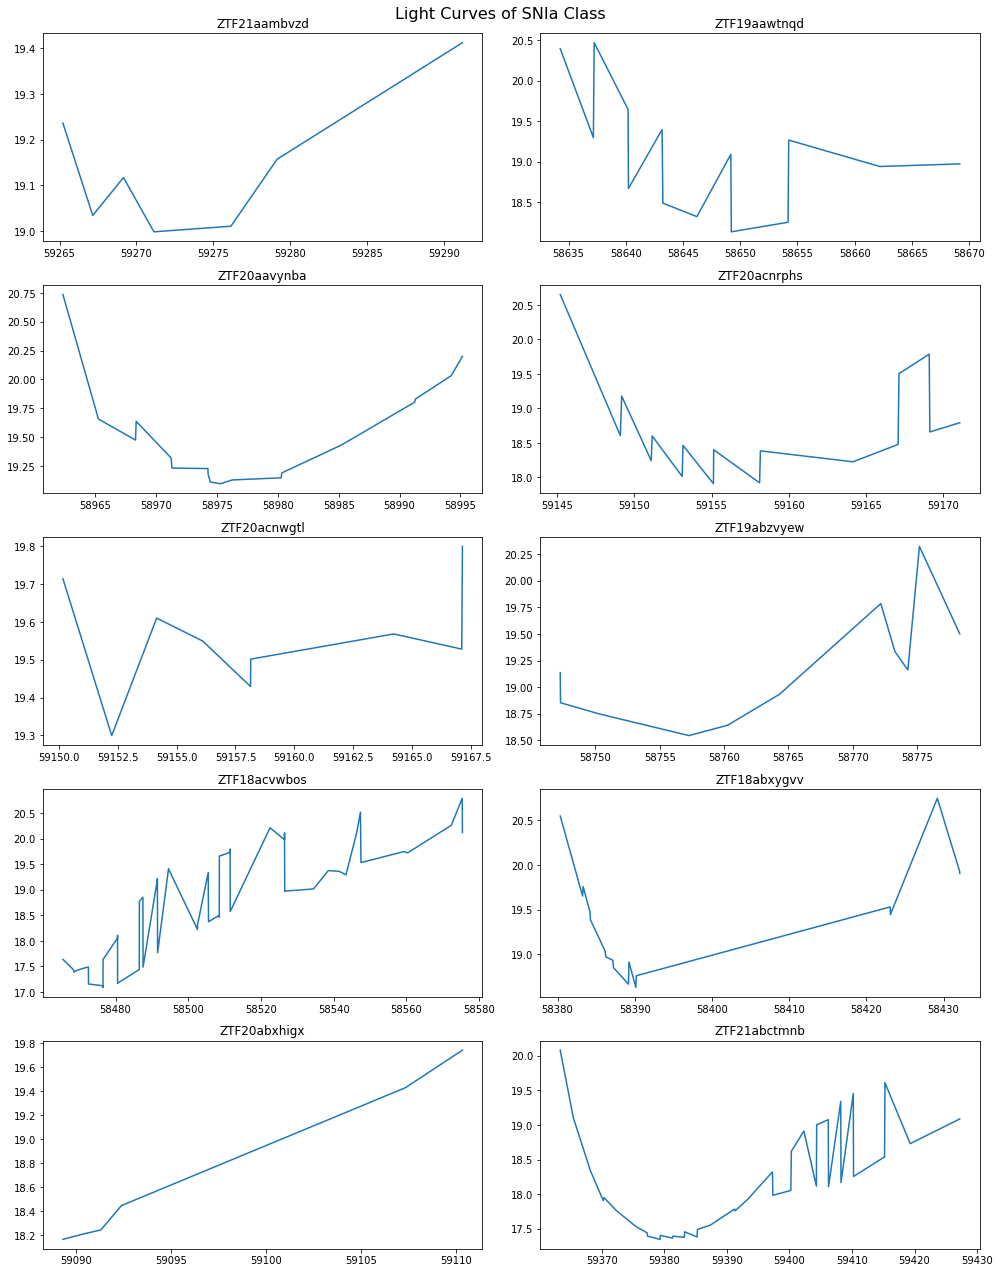

In [364]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of SNIa Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df10[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df10[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df10[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df10[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df10[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df10[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df10[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df10[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df10[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df10[9])

fig.tight_layout()

In [365]:
classes[11]

'SLSN'

In [366]:
lc01 = alerce.query_detections(df11[0],format="pandas")
lc02 = alerce.query_detections(df11[1],format="pandas")
lc03 = alerce.query_detections(df11[2],format="pandas")
lc04 = alerce.query_detections(df11[3],format="pandas")
lc05 = alerce.query_detections(df11[4],format="pandas")
lc06 = alerce.query_detections(df11[5],format="pandas")
lc07 = alerce.query_detections(df11[6],format="pandas")
lc08 = alerce.query_detections(df11[7],format="pandas")
lc09 = alerce.query_detections(df11[8],format="pandas")
lc010 = alerce.query_detections(df11[9],format="pandas") 

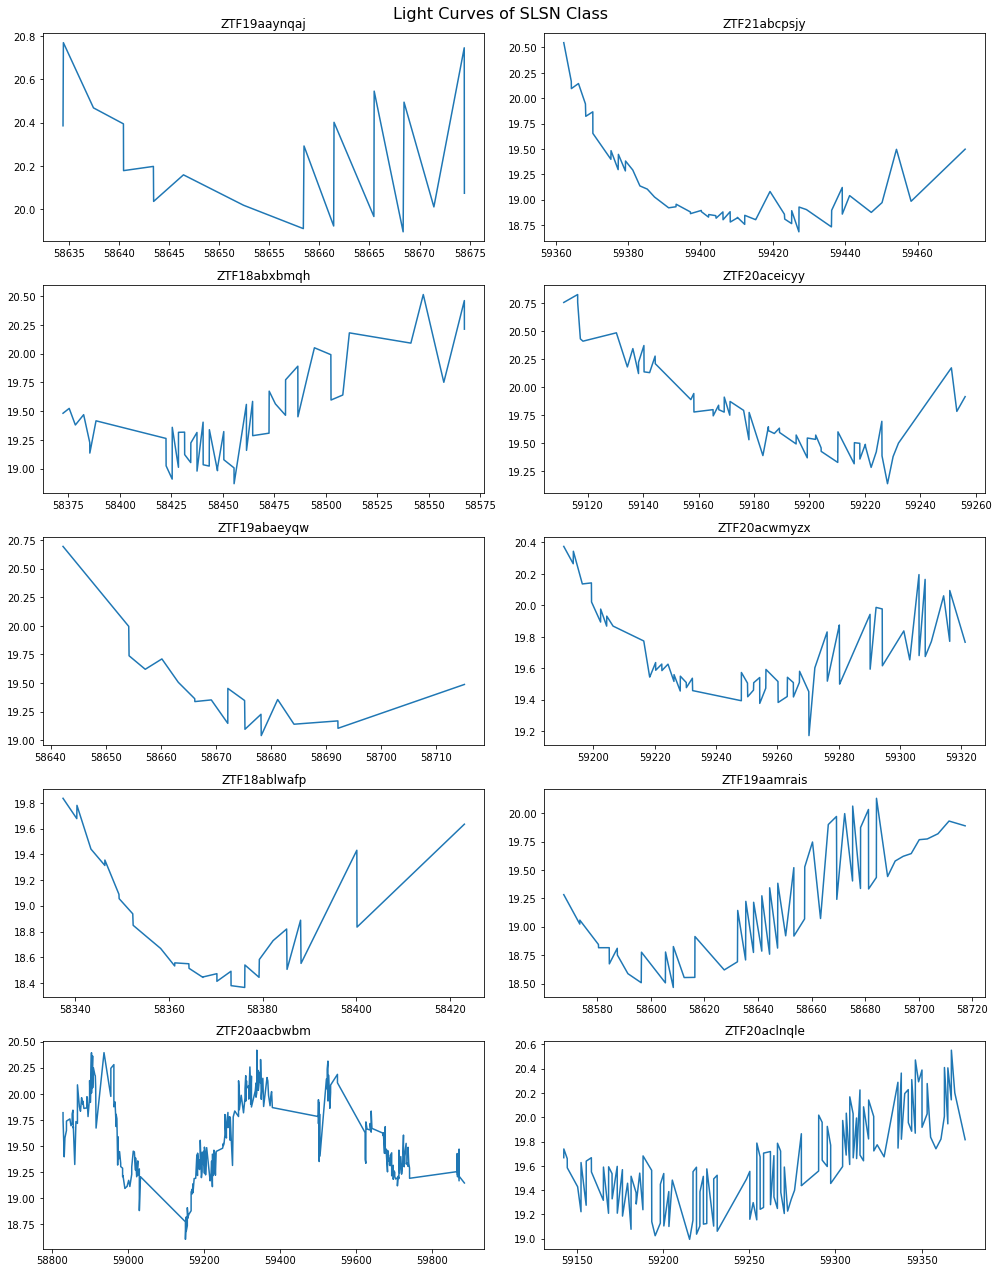

In [367]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of SLSN Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df11[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df11[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df11[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df11[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df11[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df11[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df11[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df11[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df11[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df11[9])

fig.tight_layout()

In [368]:
classes[12]

'CV/Nova'

In [369]:
lc01 = alerce.query_detections(df12[0],format="pandas")
lc02 = alerce.query_detections(df12[1],format="pandas")
lc03 = alerce.query_detections(df12[2],format="pandas")
lc04 = alerce.query_detections(df12[3],format="pandas")
lc05 = alerce.query_detections(df12[4],format="pandas")
lc06 = alerce.query_detections(df12[5],format="pandas")
lc07 = alerce.query_detections(df12[6],format="pandas")
lc08 = alerce.query_detections(df12[7],format="pandas")
lc09 = alerce.query_detections(df12[8],format="pandas")
lc010 = alerce.query_detections(df12[9],format="pandas")

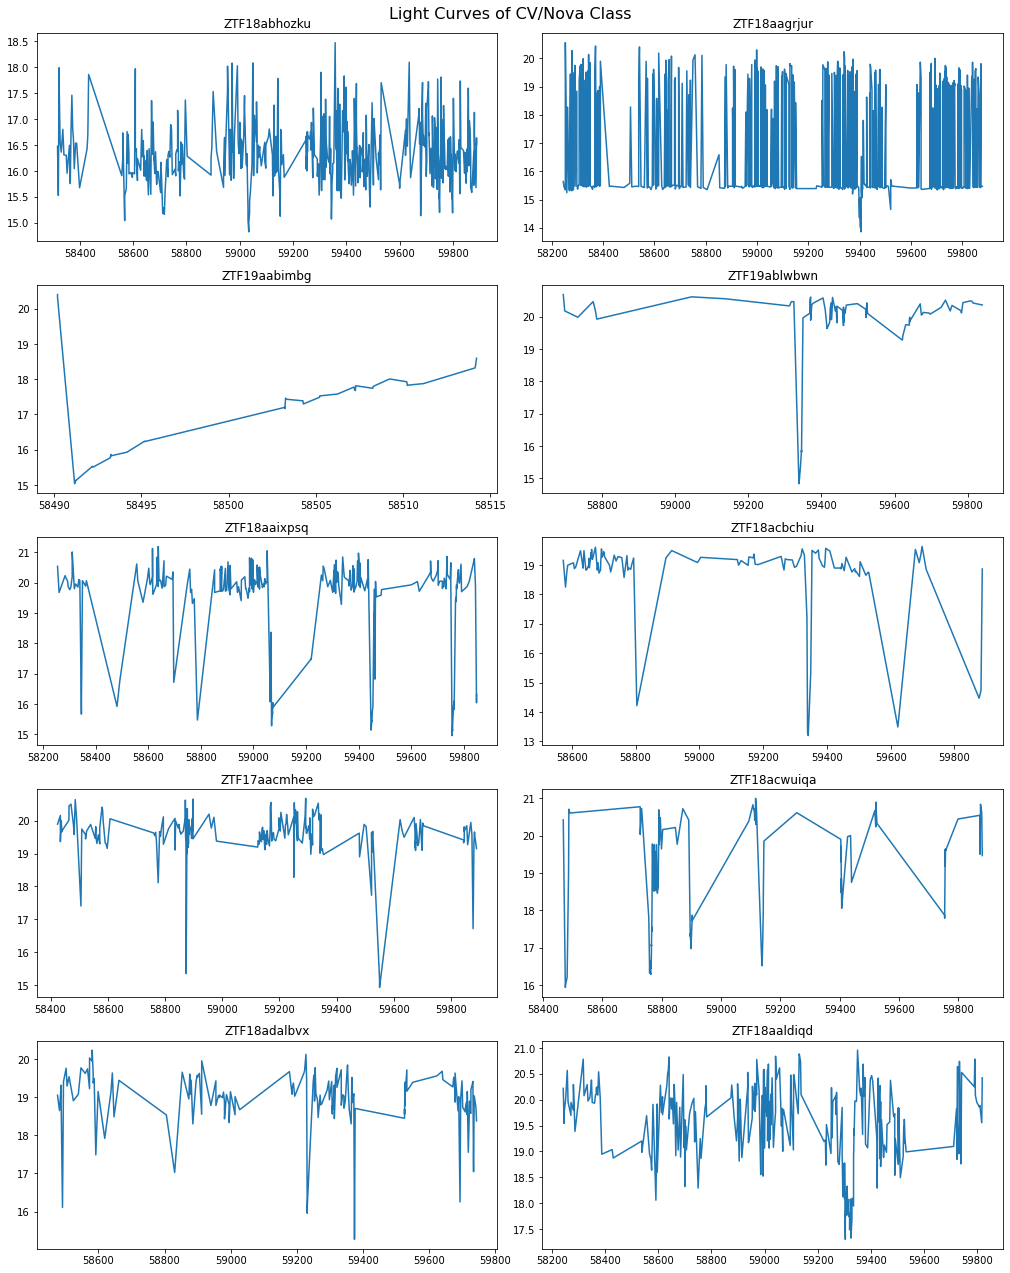

In [370]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of CV/Nova Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df12[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df12[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df12[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df12[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df12[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df12[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df12[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df12[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df12[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df12[9])

fig.tight_layout()

In [371]:
classes[13]

'SNII'

In [372]:
lc01 = alerce.query_detections(df13[0],format="pandas")
lc02 = alerce.query_detections(df13[1],format="pandas")
lc03 = alerce.query_detections(df13[2],format="pandas")
lc04 = alerce.query_detections(df13[3],format="pandas")
lc05 = alerce.query_detections(df13[4],format="pandas")
lc06 = alerce.query_detections(df13[5],format="pandas")
lc07 = alerce.query_detections(df13[6],format="pandas")
lc08 = alerce.query_detections(df13[7],format="pandas")
lc09 = alerce.query_detections(df13[8],format="pandas")
lc010 = alerce.query_detections(df13[9],format="pandas")

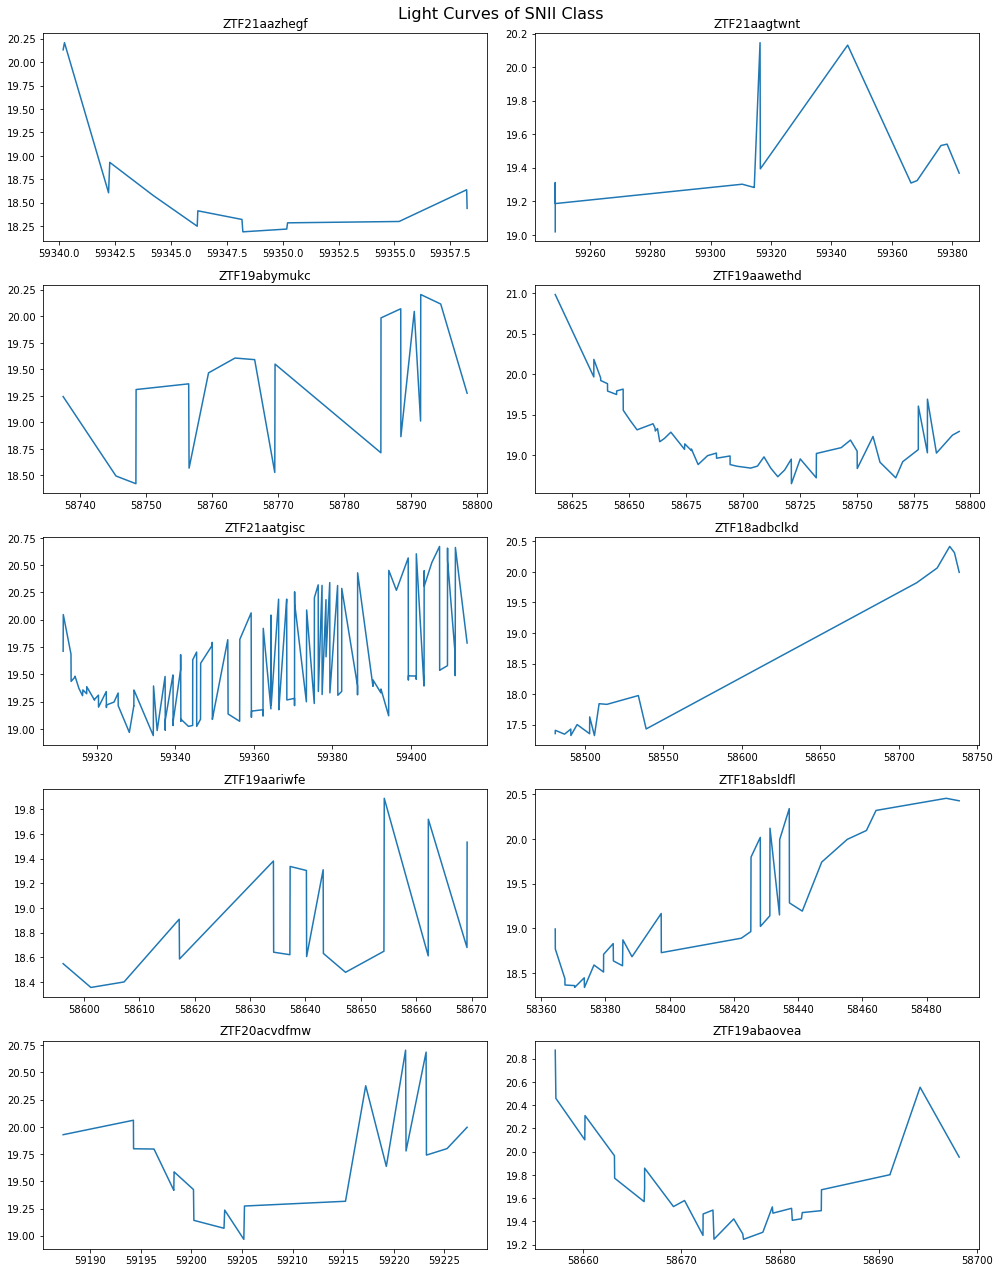

In [373]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of SNII Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df13[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df13[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df13[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df13[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df13[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df13[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df13[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df13[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df13[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df13[9])

fig.tight_layout()

In [374]:
classes[14]

'Periodic-Other'

In [375]:
lc01 = alerce.query_detections(df14[0],format="pandas")
lc02 = alerce.query_detections(df14[1],format="pandas")
lc03 = alerce.query_detections(df14[2],format="pandas")
lc04 = alerce.query_detections(df14[3],format="pandas")
lc05 = alerce.query_detections(df14[4],format="pandas")
lc06 = alerce.query_detections(df14[5],format="pandas")
lc07 = alerce.query_detections(df14[6],format="pandas")
lc08 = alerce.query_detections(df14[7],format="pandas")
lc09 = alerce.query_detections(df14[8],format="pandas")
lc010 = alerce.query_detections(df14[9],format="pandas")

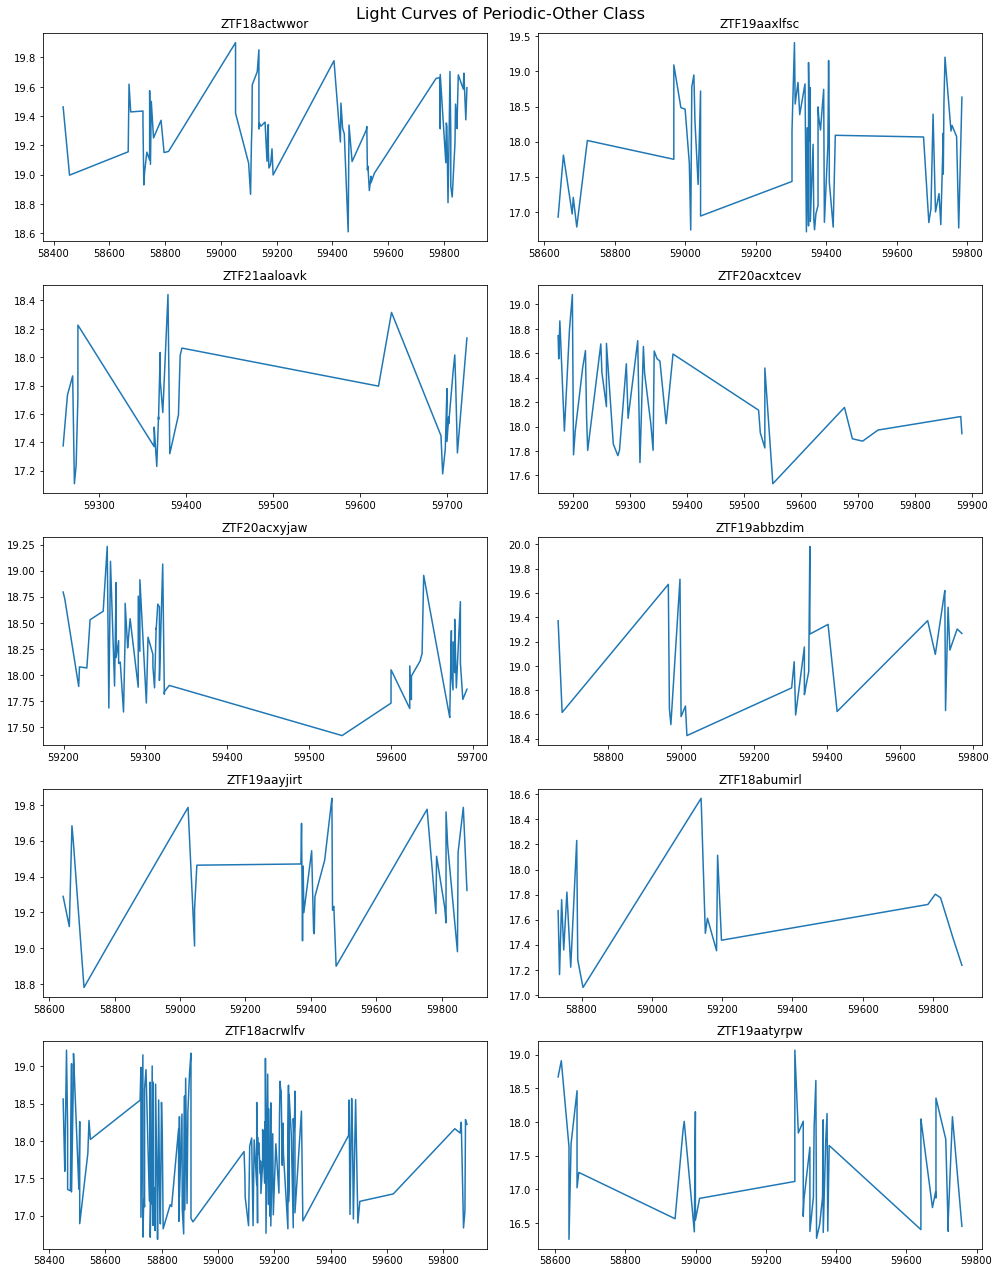

In [376]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of Periodic-Other Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df14[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df14[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df14[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df14[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df14[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df14[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df14[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df14[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df14[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df14[9])

fig.tight_layout()

In [377]:
classes[15]

'SNIbc'

In [378]:
lc01 = alerce.query_detections(df15[0],format="pandas")
lc02 = alerce.query_detections(df15[1],format="pandas")
lc03 = alerce.query_detections(df15[2],format="pandas")
lc04 = alerce.query_detections(df15[3],format="pandas")
lc05 = alerce.query_detections(df15[4],format="pandas")
lc06 = alerce.query_detections(df15[5],format="pandas")
lc07 = alerce.query_detections(df15[6],format="pandas")
lc08 = alerce.query_detections(df15[7],format="pandas")
lc09 = alerce.query_detections(df15[8],format="pandas")
lc010 = alerce.query_detections(df15[9],format="pandas")

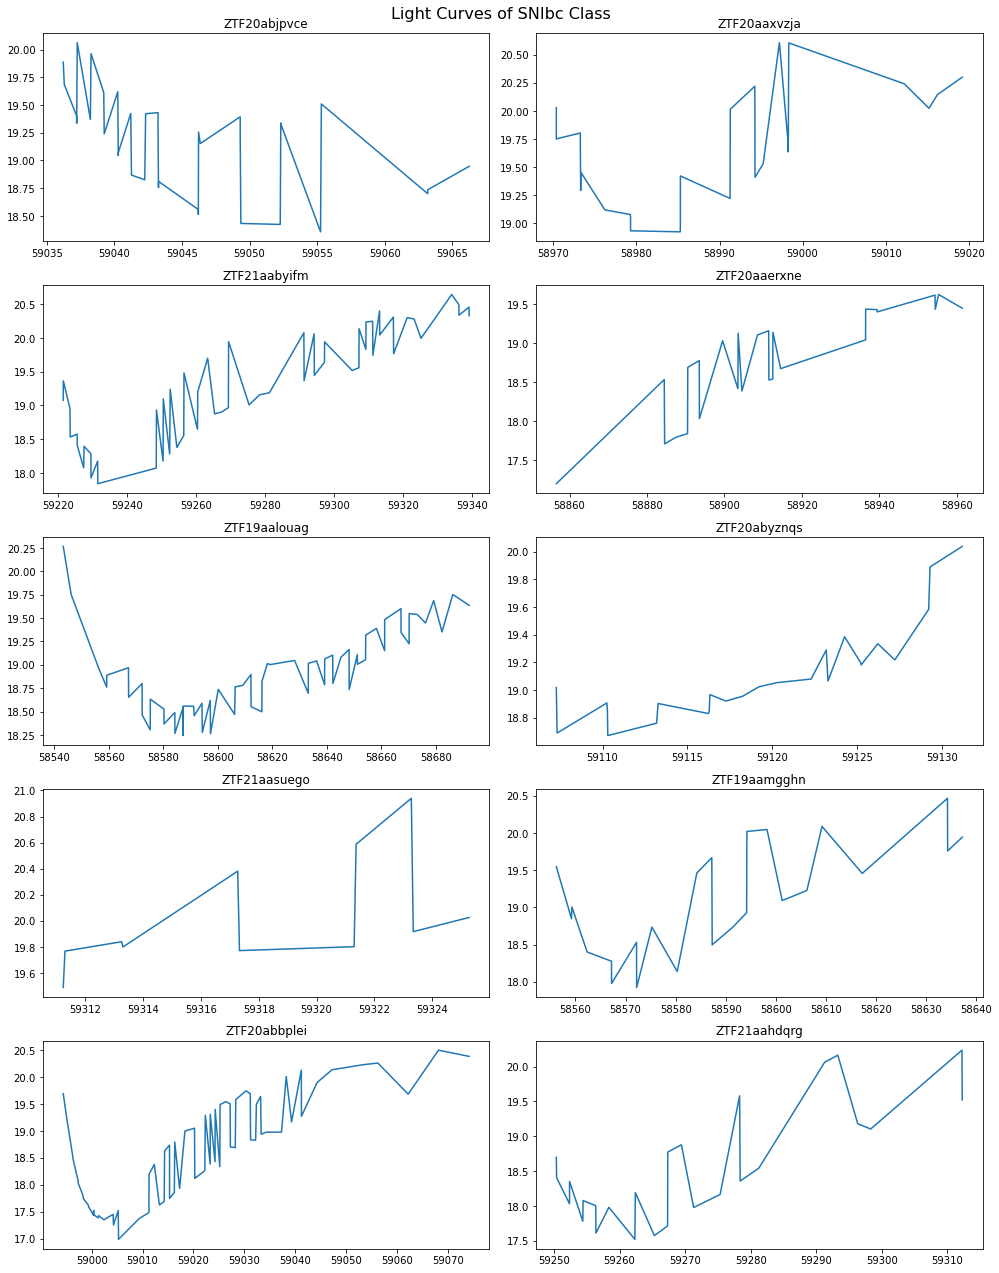

In [379]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of SNIbc Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df15[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df15[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df15[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df15[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df15[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df15[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df15[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df15[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df15[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df15[9])

fig.tight_layout()

In [380]:
classes[16]

'SNIIn'

In [381]:
lc01 = alerce.query_detections(df16[0],format="pandas")
lc02 = alerce.query_detections(df16[1],format="pandas")
lc03 = alerce.query_detections(df16[2],format="pandas")
lc04 = alerce.query_detections(df16[3],format="pandas")
lc05 = alerce.query_detections(df16[4],format="pandas")
lc06 = alerce.query_detections(df16[5],format="pandas")
lc07 = alerce.query_detections(df16[6],format="pandas")
lc08 = alerce.query_detections(df16[7],format="pandas")
lc09 = alerce.query_detections(df16[8],format="pandas")
lc010 = alerce.query_detections(df16[9],format="pandas")

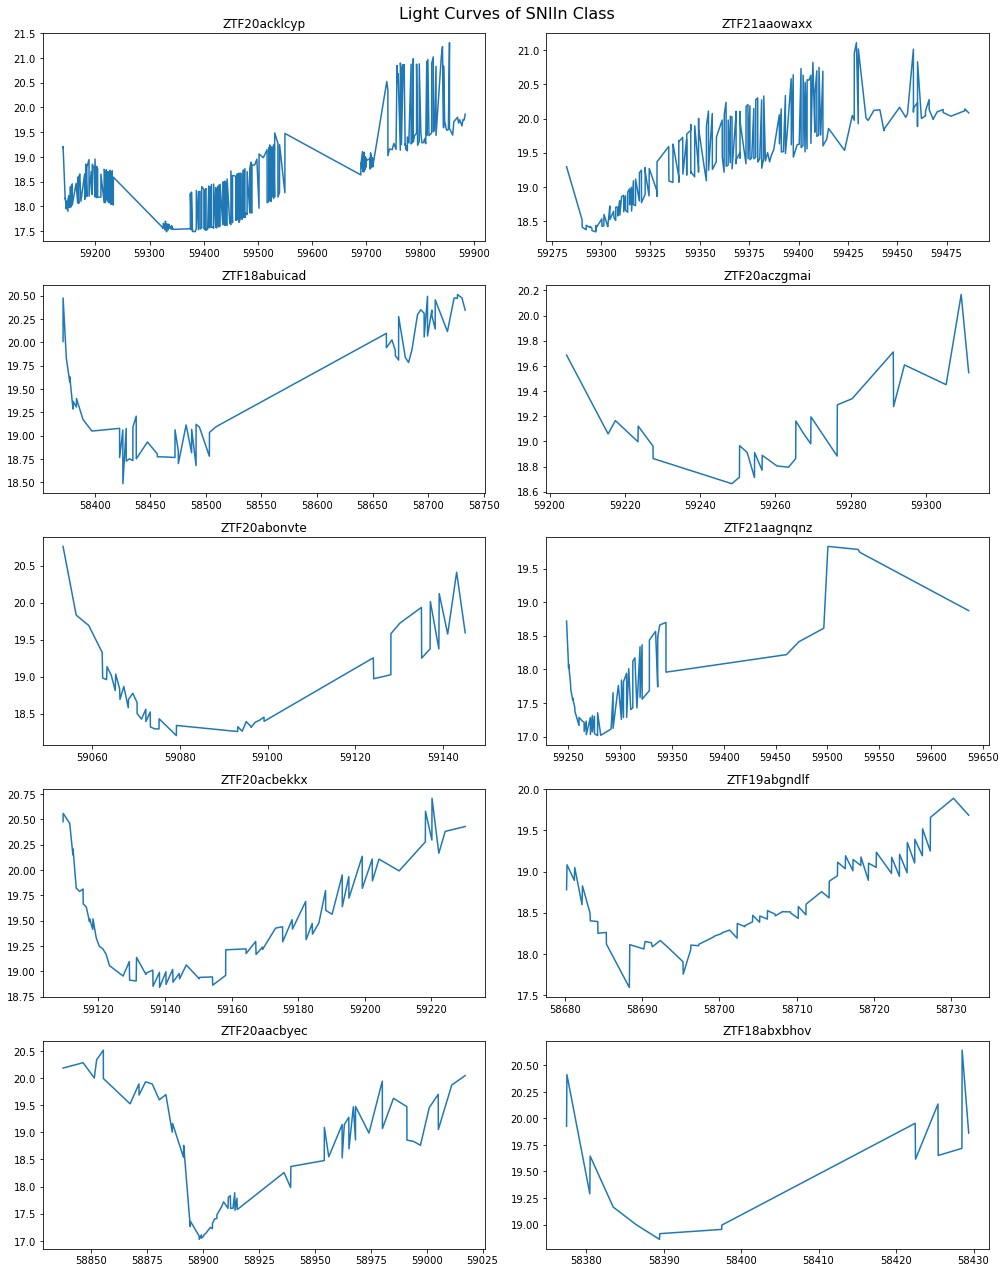

In [382]:
fig, axs = plt.subplots(5, 2, figsize=(14,18))
fig.suptitle('Light Curves of SNIIn Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df16[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df16[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df16[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df16[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df16[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df16[5])

axs[3, 0].plot(lc07['mjd'].values, lc07['magpsf'].values)
axs[3, 0].set_title(df16[6])

axs[3, 1].plot(lc08['mjd'].values, lc08['magpsf'].values)
axs[3, 1].set_title(df16[7])

axs[4, 0].plot(lc09['mjd'].values, lc09['magpsf'].values)
axs[4, 0].set_title(df16[8])

axs[4, 1].plot(lc010['mjd'].values, lc010['magpsf'].values)
axs[4, 1].set_title(df16[9])

fig.tight_layout()

For this last class, we only graph all the 7 objects we have, 6 in subplots and the seventh in a plot apart.

In [383]:
classes[17]

'SNIIb'

In [384]:
lc01 = alerce.query_detections(df17[0],format="pandas")
lc02 = alerce.query_detections(df17[1],format="pandas")
lc03 = alerce.query_detections(df17[2],format="pandas")
lc04 = alerce.query_detections(df17[3],format="pandas")
lc05 = alerce.query_detections(df17[4],format="pandas")
lc06 = alerce.query_detections(df17[5],format="pandas")
lc07 = alerce.query_detections(df17[6],format="pandas")

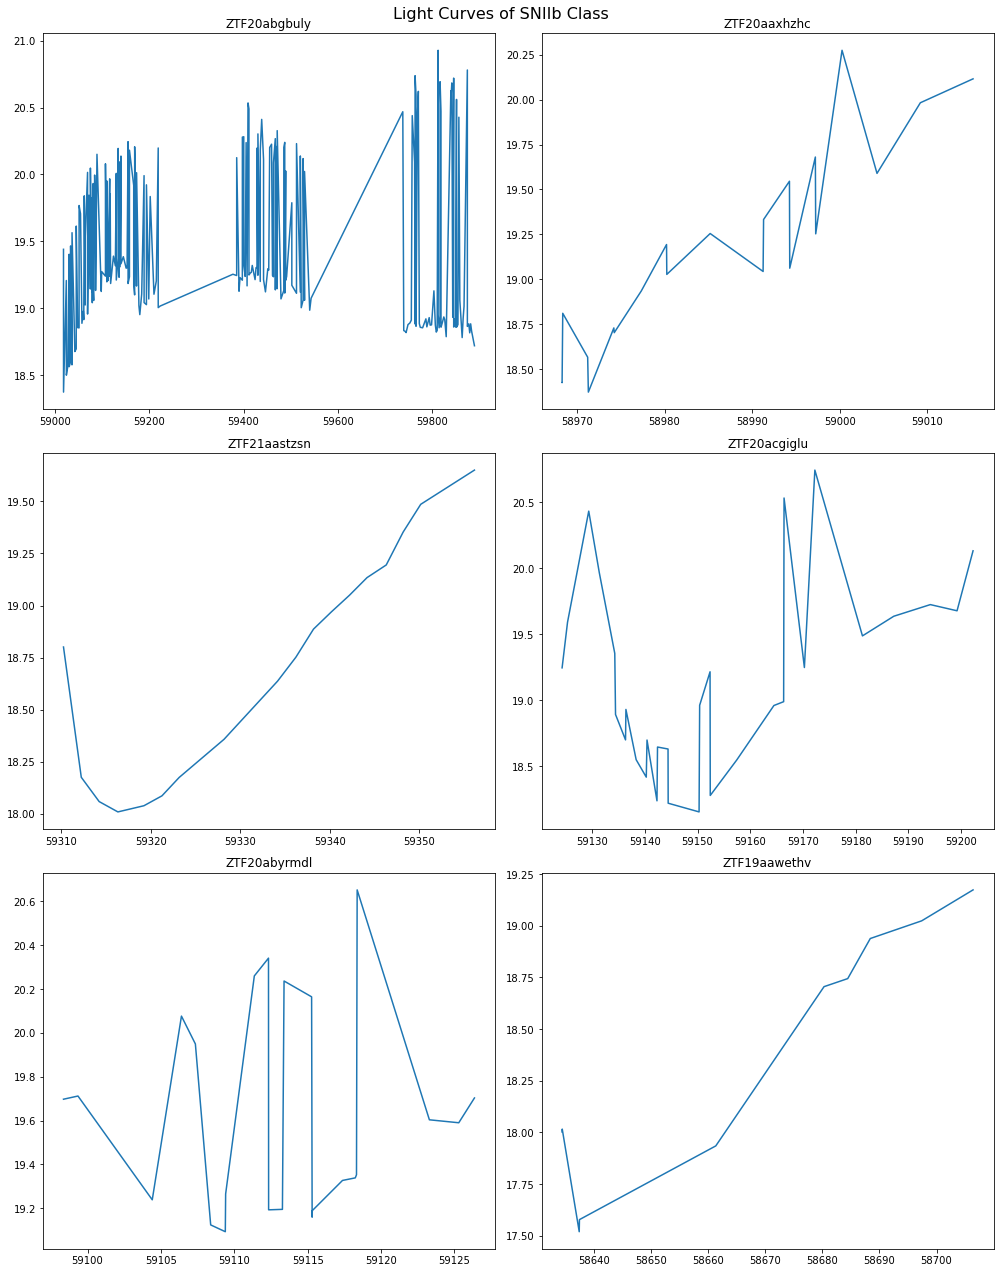

In [385]:
fig, axs = plt.subplots(3, 2, figsize=(14,18))
fig.suptitle('Light Curves of SNIIb Class', size=16)


axs[0, 0].plot(lc01['mjd'].values, lc01['magpsf'].values)
axs[0, 0].set_title(df17[0])

axs[0, 1].plot(lc02['mjd'].values, lc02['magpsf'].values)
axs[0, 1].set_title(df17[1])

axs[1, 0].plot(lc03['mjd'].values, lc03['magpsf'].values)
axs[1, 0].set_title(df17[2])

axs[1, 1].plot(lc04['mjd'].values, lc04['magpsf'].values)
axs[1, 1].set_title(df17[3])

axs[2, 0].plot(lc05['mjd'].values, lc05['magpsf'].values)
axs[2, 0].set_title(df17[4])

axs[2, 1].plot(lc06['mjd'].values, lc06['magpsf'].values)
axs[2, 1].set_title(df17[5])

fig.tight_layout()

Text(0.5, 1.0, 'ZTF19aczmnqy')

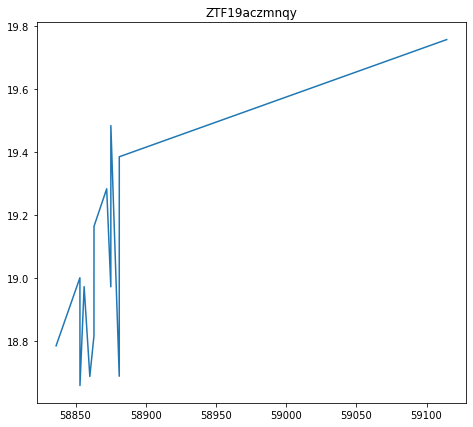

In [386]:
plt.figure(figsize=(7.7, 7))
plt.plot(lc07['mjd'].values, lc07['magpsf'].values)
plt.title(df17[6])

#### b.

In [387]:
sample = dataframe.sample(30)

In [388]:
sample

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18abefvqp         RRL        0.680975        0.372739   
ZTF18aagqzzi         RRL        0.288363        0.247803   
ZTF18adarwby          EB        0.792593        0.989223   
ZTF19acxvimu        DSCT        0.270587        0.115845   
ZTF18aayfamn         LPV        0.704963        0.800658   
ZTF18abmprrp         RRL        0.557339        0.397255   
ZTF18aatqhrn          EB        0.332782        0.318927   
ZTF19abfjsrf         LPV        0.402083        0.341036   
ZTF18abbspqy         LPV        0.513236        0.735681   
ZTF18aaadenm         RRL        0.717874        0.519720   
ZTF17aaagvip         YSO        1.386740        0.998241   
ZTF21aadqcdj          EB        0.515592        0.486618   
ZTF20abolwqu         QSO        0.104995        0.341036   
ZTF18abdrnsy         RRL        0.683316        0.532263   
ZTF20aammjli         RRL        0.304418        0.243762   
ZTF18acskevr          EB        0.104065        0.104695   
ZTF20acpzdow         AGN        0.086419        0.341036   
ZTF17aabpexe         RRL        0.402083        0.445124   
ZTF20aaobwyg          EB        0.152265        0.196640   
ZTF20abgapzk         QSO        0.105923        0.045190   
ZTF18aaadfxf          EB        0.540053        0.631891   
ZTF18aboeyar         LPV        0.402083        0.083800   
ZTF19aayhrcc         RRL        0.712848        0.535729   
ZTF18abdkfif          EB        0.805605        0.650056   
ZTF18aabkbvu          EB        0.652128        0.560003   
ZTF18aaehvia         QSO        0.020793        0.341036   
ZTF18aawvbdk         LPV        1.509446        1.369158   
ZTF17aaajmuv         RRL        0.621340        0.446919   
ZTF18abjmgun         LPV        0.904191        0.341036   
ZTF17aaadyyg         LPV        1.374217        1.007906   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18abefvqp              1.000000              0.504075                  1.0   
ZTF18aagqzzi              1.000000              1.000000                  1.0   
ZTF18adarwby              0.983286              0.997615                  1.0   
ZTF19acxvimu              0.999950              0.924309                  1.0   
ZTF18aayfamn              1.000000              1.000000                 24.0   
ZTF18abmprrp              1.000000              1.000000                  1.0   
ZTF18aatqhrn              0.999998              0.999953                  1.0   
ZTF19abfjsrf              0.999934              0.999747                  1.0   
ZTF18abbspqy              0.327915              0.994337                  3.0   
ZTF18aaadenm              1.000000              0.999326                  1.0   
ZTF17aaagvip              1.000000              0.776285                  6.0   
ZTF21aadqcdj              0.951908              0.986666                  1.0   
ZTF20abolwqu              0.796908              0.999747                  1.0   
ZTF18abdrnsy              1.000000              0.999999                  1.0   
ZTF20aammjli              1.000000              1.000000                  1.0   
ZTF18acskevr              1.000000              1.000000                  1.0   
ZTF20acpzdow              0.609785              0.999747                  1.0   
ZTF17aabpexe              0.999934              0.479729                  1.0   
ZTF20aaobwyg              0.999999              0.994730                  1.0   
ZTF20abgapzk              0.330517              0.764824                  1.0   
ZTF18aaadfxf              0.998286              0.999962                  1.0   
ZTF18aboeyar              0.999934              0.985456                  1.0   
ZTF19aayhrcc              1.000000              1.000000                  1.0   
ZTF18abdkfif              0.998412              0.452192           

In [389]:
dfs = sample.index.values

In [390]:
lc1 = alerce.query_detections(dfs[0],format="pandas")
lc2 = alerce.query_detections(dfs[1],format="pandas")
lc3 = alerce.query_detections(dfs[2],format="pandas")
lc4 = alerce.query_detections(dfs[3],format="pandas")
lc5 = alerce.query_detections(dfs[4],format="pandas")
lc6 = alerce.query_detections(dfs[5],format="pandas")
lc7 = alerce.query_detections(dfs[6],format="pandas")
lc8 = alerce.query_detections(dfs[7],format="pandas")
lc9 = alerce.query_detections(dfs[8],format="pandas")
lc10 = alerce.query_detections(dfs[9],format="pandas")
lc11 = alerce.query_detections(dfs[10],format="pandas")
lc12 = alerce.query_detections(dfs[11],format="pandas")
lc13 = alerce.query_detections(dfs[12],format="pandas")
lc14 = alerce.query_detections(dfs[13],format="pandas")
lc15 = alerce.query_detections(dfs[14],format="pandas")
lc16 = alerce.query_detections(dfs[15],format="pandas")
lc17 = alerce.query_detections(dfs[16],format="pandas")
lc18 = alerce.query_detections(dfs[17],format="pandas")
lc19 = alerce.query_detections(dfs[18],format="pandas")
lc20 = alerce.query_detections(dfs[19],format="pandas")
lc21 = alerce.query_detections(dfs[20],format="pandas")
lc22 = alerce.query_detections(dfs[21],format="pandas")
lc23 = alerce.query_detections(dfs[22],format="pandas")
lc24 = alerce.query_detections(dfs[23],format="pandas")
lc25 = alerce.query_detections(dfs[24],format="pandas")
lc26 = alerce.query_detections(dfs[25],format="pandas")
lc27 = alerce.query_detections(dfs[26],format="pandas")
lc28 = alerce.query_detections(dfs[27],format="pandas")
lc29 = alerce.query_detections(dfs[28],format="pandas")
lc30 = alerce.query_detections(dfs[29],format="pandas")

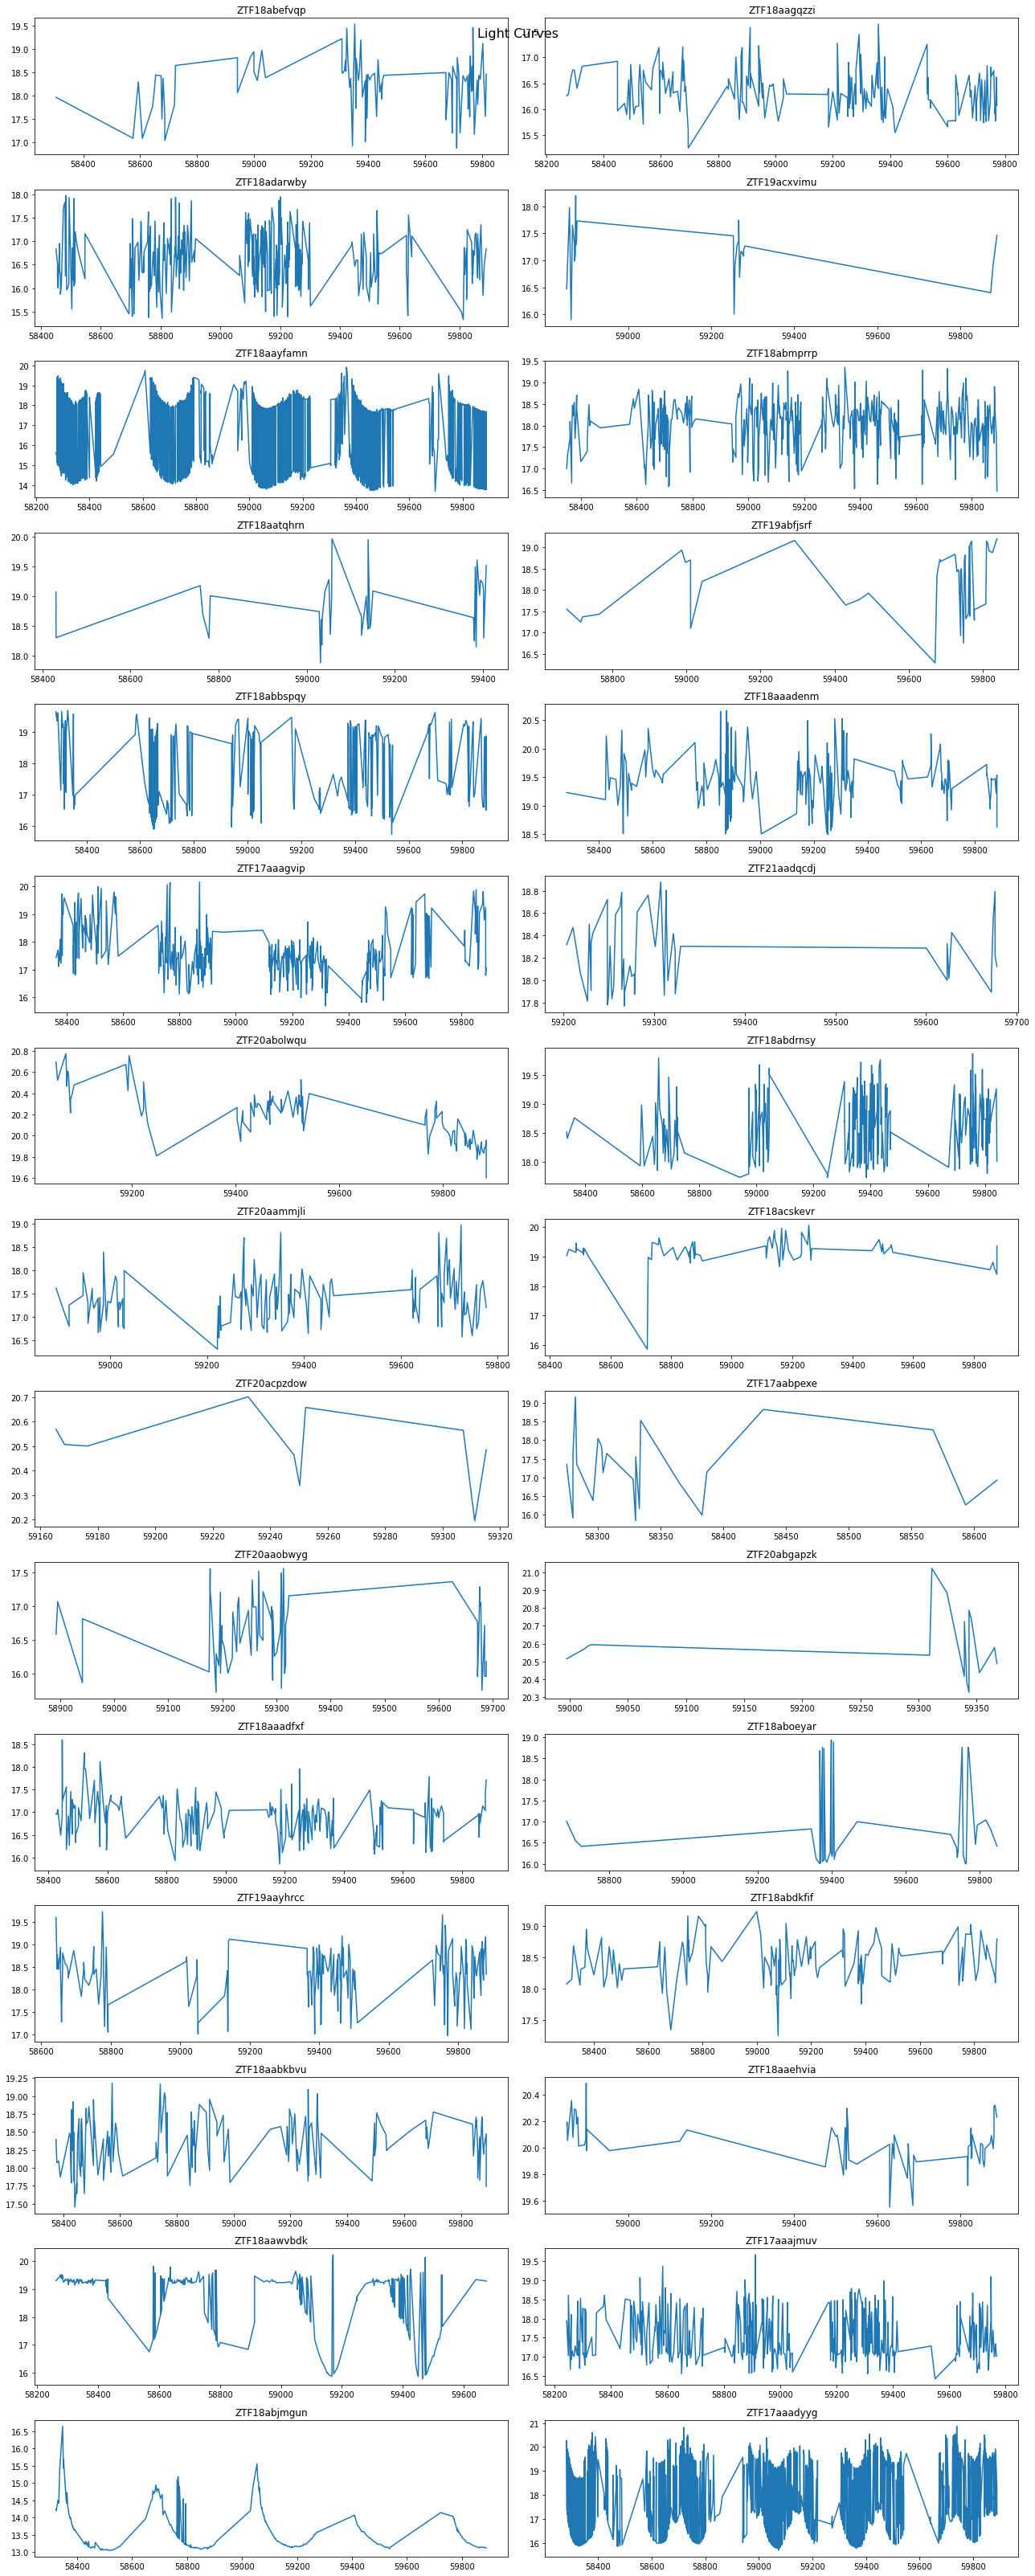

In [391]:
fig, axs = plt.subplots(15, 2, figsize=(18,45))
fig.suptitle('Light Curves', size=16)

axs[0, 0].plot(lc1['mjd'].values, lc1['magpsf'].values)
axs[0, 0].set_title(dfs[0])

axs[0, 1].plot(lc2['mjd'].values, lc2['magpsf'].values)
axs[0, 1].set_title(dfs[1])

axs[1, 0].plot(lc3['mjd'].values, lc3['magpsf'].values)
axs[1, 0].set_title(dfs[2])

axs[1, 1].plot(lc4['mjd'].values, lc4['magpsf'].values)
axs[1, 1].set_title(dfs[3])

axs[2, 0].plot(lc5['mjd'].values, lc5['magpsf'].values)
axs[2, 0].set_title(dfs[4])

axs[2, 1].plot(lc6['mjd'].values, lc6['magpsf'].values)
axs[2, 1].set_title(dfs[5])

axs[3, 0].plot(lc7['mjd'].values, lc7['magpsf'].values)
axs[3, 0].set_title(dfs[6])

axs[3, 1].plot(lc8['mjd'].values, lc8['magpsf'].values)
axs[3, 1].set_title(dfs[7])

axs[4, 0].plot(lc9['mjd'].values, lc9['magpsf'].values)
axs[4, 0].set_title(dfs[8])

axs[4, 1].plot(lc10['mjd'].values, lc10['magpsf'].values)
axs[4, 1].set_title(dfs[9])

axs[5, 0].plot(lc11['mjd'].values, lc11['magpsf'].values)
axs[5, 0].set_title(dfs[10])

axs[5, 1].plot(lc12['mjd'].values, lc12['magpsf'].values)
axs[5, 1].set_title(dfs[11])

axs[6, 0].plot(lc13['mjd'].values, lc13['magpsf'].values)
axs[6, 0].set_title(dfs[12])

axs[6, 1].plot(lc14['mjd'].values, lc14['magpsf'].values)
axs[6, 1].set_title(dfs[13])

axs[7, 0].plot(lc15['mjd'].values, lc15['magpsf'].values)
axs[7, 0].set_title(dfs[14])

axs[7, 1].plot(lc16['mjd'].values, lc16['magpsf'].values)
axs[7, 1].set_title(dfs[15])

axs[8, 0].plot(lc17['mjd'].values, lc17['magpsf'].values)
axs[8, 0].set_title(dfs[16])

axs[8, 1].plot(lc18['mjd'].values, lc18['magpsf'].values)
axs[8, 1].set_title(dfs[17])

axs[9, 0].plot(lc19['mjd'].values, lc19['magpsf'].values)
axs[9, 0].set_title(dfs[18])

axs[9, 1].plot(lc20['mjd'].values, lc20['magpsf'].values)
axs[9, 1].set_title(dfs[19])

axs[10, 0].plot(lc21['mjd'].values, lc21['magpsf'].values)
axs[10, 0].set_title(dfs[20])

axs[10, 1].plot(lc22['mjd'].values, lc22['magpsf'].values)
axs[10, 1].set_title(dfs[21])

axs[11, 0].plot(lc23['mjd'].values, lc23['magpsf'].values)
axs[11, 0].set_title(dfs[22])

axs[11, 1].plot(lc24['mjd'].values, lc24['magpsf'].values)
axs[11, 1].set_title(dfs[23])

axs[12, 0].plot(lc25['mjd'].values, lc25['magpsf'].values)
axs[12, 0].set_title(dfs[24])

axs[12, 1].plot(lc26['mjd'].values, lc26['magpsf'].values)
axs[12, 1].set_title(dfs[25])

axs[13, 0].plot(lc27['mjd'].values, lc27['magpsf'].values)
axs[13, 0].set_title(dfs[26])

axs[13, 1].plot(lc28['mjd'].values, lc28['magpsf'].values)
axs[13, 1].set_title(dfs[27])

axs[14, 0].plot(lc29['mjd'].values, lc29['magpsf'].values)
axs[14, 0].set_title(dfs[28])

axs[14, 1].plot(lc30['mjd'].values, lc30['magpsf'].values)
axs[14, 1].set_title(dfs[29])

fig.tight_layout()

I consider that a priori we can not classify the 30 random samples choosen visually, by only seeing their lightcurves, because despite there are a little classALeRCE classes that have a peculiar form or that each of the 10 samples taken gives us light curves that have some details in common (like repeated patrons, crecent or decrecent behaviour, or some with a lot of peaks), but there are curves from different classes that also seem so similar, so the visual classification would not be very accurate.

In [392]:
import umap
from sklearn.preprocessing import StandardScaler

In [393]:
reducer = umap.UMAP()

In [394]:
scaled_X = StandardScaler().fit_transform(X)

In [395]:
classALeRCE_umap = reducer.fit_transform(scaled_X)
classALeRCE_umap.shape

(38981, 2)

In [396]:
cl = dataframe["classALeRCE"].values

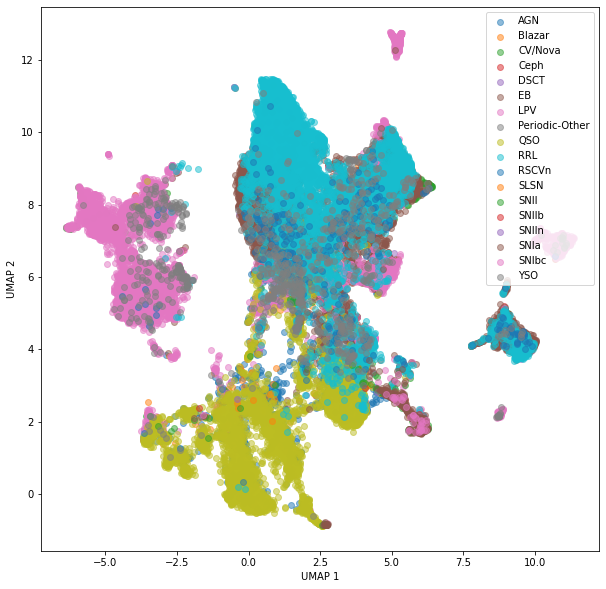

In [397]:
fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for i in np.unique(cl):
    mask = (cl == i)
    ax.scatter(classALeRCE_umap[mask][:, 0], classALeRCE_umap[mask][:, 1], label = i, alpha = 0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend();

We can see in the UMAP that some cluster structures are formed, of points of almost the same color like the green, the magenta and the light blue, and also there are some other points of different colors in the clusters beacuse this are points that can be confused when classifying and can be predicted as one of those two classes. The four marked structires are distributed in a very particular way, so that the large blue one and the green one are almost together, while the other blue one and the magenta are separated from them and from each other, very apart from the central structure.

### 3. Building the Training and Test Sets and Train the Model:

In [398]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(scaled_X, y, test_size=0.3)

In [399]:
x_train.shape, Y_train.shape

((27286, 179), (27286,))

In [400]:
x_test.shape, Y_test.shape

((11695, 179), (11695,))

In [401]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [402]:
le.fit(classes)
list(le.classes_)

['AGN',
 'Blazar',
 'CV/Nova',
 'Ceph',
 'DSCT',
 'EB',
 'LPV',
 'Periodic-Other',
 'QSO',
 'RRL',
 'RSCVn',
 'SLSN',
 'SNII',
 'SNIIb',
 'SNIIn',
 'SNIa',
 'SNIbc',
 'YSO']

In [403]:
Yencdtrain = le.transform(Y_train)
Yencdtest = le.transform(Y_test)

In [404]:
x_train.shape, Yencdtrain.shape

((27286, 179), (27286,))

In [405]:
x_test.shape, Yencdtest.shape

((11695, 179), (11695,))

In [406]:
le.fit(y)
list(le.classes_)

['AGN',
 'Blazar',
 'CV/Nova',
 'Ceph',
 'DSCT',
 'EB',
 'LPV',
 'Periodic-Other',
 'QSO',
 'RRL',
 'RSCVn',
 'SLSN',
 'SNII',
 'SNIIb',
 'SNIIn',
 'SNIa',
 'SNIbc',
 'YSO']

In [407]:
Yencd = le.transform(y)

We will use the two classifier methods of Desicion Tree and Random Forest.

For the Desicion Tree Classifier, there are various hyperparameters and in this case we are going to apply the k-fold Cross Validation only for the most relevant hyperparameter: the Maximum Depth of the Tree (max_depth).

First, we define de StratifiedKFold with 7 splits and a random state of 42, which will be used for both classifier methods.

In each case, we are going to calculate the accuracy metric for each of the 20 values choosen for the hyperparameter to decide which value is the best for each method.

In [408]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accuracy = {}
max_depth = np.arange(1, 21, 1)

for i in max_depth:
    accuracy[i] = []
    for index, traintest in enumerate(kf.split(scaled_X, Yencd)):
        train, test = traintest
        dt = DecisionTreeClassifier(max_depth=i)
        y_pred = dt.fit(x_train, Yencdtrain).predict(x_test)
        accuracy[i].append(metrics.accuracy_score(Yencdtest, y_pred))
    accuracy[i] = np.average(accuracy[i])
    print("Accuracy (Maximum Depth = %i):" % i, metrics.accuracy_score(Yencdtest, y_pred))
    
accuracy = list(accuracy.values())

Accuracy (Maximum Depth = 1): 0.42069260367678496
Accuracy (Maximum Depth = 2): 0.5911928174433518
Accuracy (Maximum Depth = 3): 0.7008978195810175
Accuracy (Maximum Depth = 4): 0.7442496793501496
Accuracy (Maximum Depth = 5): 0.7761436511329628
Accuracy (Maximum Depth = 6): 0.8070115433946131
Accuracy (Maximum Depth = 7): 0.8277896536981616
Accuracy (Maximum Depth = 8): 0.8418127404873877
Accuracy (Maximum Depth = 9): 0.847199657973493
Accuracy (Maximum Depth = 10): 0.8508764429243266
Accuracy (Maximum Depth = 11): 0.8512184694313809
Accuracy (Maximum Depth = 12): 0.8509619495510902
Accuracy (Maximum Depth = 13): 0.8466866182129115
Accuracy (Maximum Depth = 14): 0.8444634459170586
Accuracy (Maximum Depth = 15): 0.8452330055579308
Accuracy (Maximum Depth = 16): 0.8448909790508764
Accuracy (Maximum Depth = 17): 0.8412141941000427
Accuracy (Maximum Depth = 18): 0.8390765284309534
Accuracy (Maximum Depth = 19): 0.8388200085506626
Accuracy (Maximum Depth = 20): 0.8353997434801197


Text(0.5, 0, 'Maximum Depth')

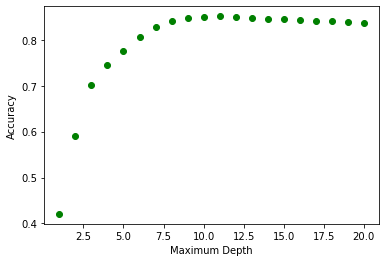

In [409]:
plt.scatter(max_depth, accuracy, c = 'g')
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth")

As we can see, from the k-fold CV in the accuracy graph, that the best value of the hyperparameter max_depth for the DecisionTree Classifier is 11, because they it has the highest accuracy value associated, so the nearest to one the accuracy is, it means the better the classifier predicts the classes.

For the KNeighbors Classifier, there are also different hyperparameters that the method needs, but in this case we are going to apply the k-fold Cross Validation only for its most relevant hyperparameter: the Number of Neighbors (n_neighbors).

In [411]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = {}
nneighbors = [1, 2, 5, 7, 10, 16, 23, 28, 32, 45, 49, 51, 57, 64, 68, 72, 86, 93, 105, 117, 128]
for i in nneighbors:
    accuracy[i] = []
    for index, traintest in enumerate(kf.split(scaled_X, Yencd)):
        train, test = traintest
        kn = KNeighborsClassifier(n_neighbors=i)
        Y_pred = kn.fit(x_train, Yencdtrain).predict(x_test)
        accuracy[i].append(metrics.accuracy_score(Yencdtest, Y_pred))
    accuracy[i] = np.average(accuracy[i])
    print("Accuracy (Number of Neighbors = %i):" % i, metrics.accuracy_score(Yencdtest, Y_pred))
accuracy = list(accuracy.values())

Accuracy (Number of Neighbors = 1): 0.7967507481829842
Accuracy (Number of Neighbors = 2): 0.8002565198802907
Accuracy (Number of Neighbors = 5): 0.8396750748182984
Accuracy (Number of Neighbors = 7): 0.8420692603676785
Accuracy (Number of Neighbors = 10): 0.8430953398888413
Accuracy (Number of Neighbors = 16): 0.8418127404873877
Accuracy (Number of Neighbors = 23): 0.839162035057717
Accuracy (Number of Neighbors = 28): 0.8370243693886276
Accuracy (Number of Neighbors = 32): 0.8361693031209919
Accuracy (Number of Neighbors = 45): 0.8342881573321932
Accuracy (Number of Neighbors = 49): 0.8307823856348867
Accuracy (Number of Neighbors = 51): 0.8289012398460881
Accuracy (Number of Neighbors = 57): 0.827704147071398
Accuracy (Number of Neighbors = 64): 0.8268490808037623
Accuracy (Number of Neighbors = 68): 0.825908507909363
Accuracy (Number of Neighbors = 72): 0.8248824283882001
Accuracy (Number of Neighbors = 86): 0.8241128687473279
Accuracy (Number of Neighbors = 93): 0.8236853356135101

Text(0.5, 0, 'Number of Neighbors')

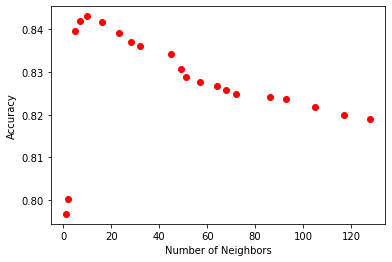

In [412]:
plt.scatter(nneighbors, accuracy, c = 'r')
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")

As in the previous method, here we can see in the accuracy graph, that for the KNeighbors Classifier, the best value of its hyperparameter n_neighbors is 10, because that numer of neighbors corresponds to the highest value of accuracy, so that this n_neighbors gives us the most accurate and approximate predictions of the classes.

### 4. Model Metrics:

Now we train the model with the method Desicion Tree Classifier, using the hyperparameter max_depth = 11.

In [415]:
y1_pred = DecisionTreeClassifier(max_depth=11).fit(x_train, Yencdtrain).predict(x_test)

In [416]:
metrics.accuracy_score(Yencdtest, y1_pred)

0.8501923899102181

To continue, now we train the model with the method KNeighbors Classifier, using the hyperparameter n_neighbors = 10.

In [417]:
y2_pred = KNeighborsClassifier(n_neighbors=10).fit(x_train, Yencdtrain).predict(x_test)

In [418]:
metrics.accuracy_score(Yencdtest, y2_pred)

0.8430953398888413

ROC Curve for the Desicion Tree Classifier

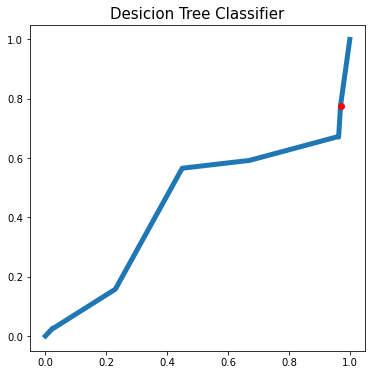

In [419]:
figure = plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = metrics.roc_curve(Yencdtest, y1_pred, pos_label=1)
plt.title('Desicion Tree Classifier', fontsize=15)
plt.plot(fpr, tpr, lw = 5)
idx = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fpr[idx], tpr[idx], marker='o', c='r', zorder=10)

ROC Curve for the KNeighbors Classifier

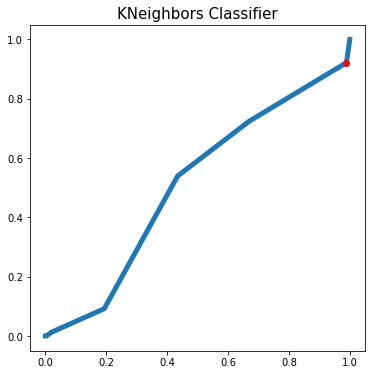

In [420]:
figure = plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = metrics.roc_curve(Yencdtest, y2_pred, pos_label=1)
plt.title('KNeighbors Classifier', fontsize=15)
plt.plot(fpr, tpr, lw = 5)
idx = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fpr[idx], tpr[idx], marker='o', c='r', zorder=10)

List of the Classes

In [423]:
cc = classes.tolist()

Algorithm for the Confusion Matrix

In [424]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix for Desicion Tree Classifier

Confusion matrix, without normalization


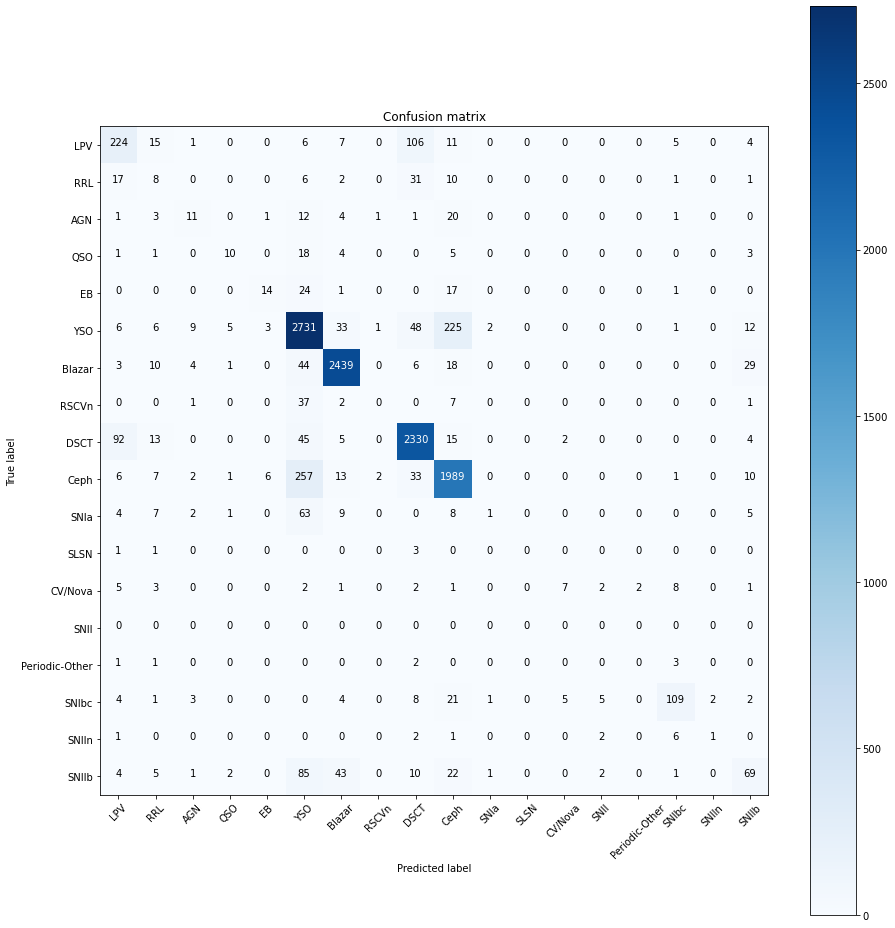

In [425]:
plt.figure(figsize=(13,13))
plot_confusion_matrix(metrics.confusion_matrix(Yencdtest, y1_pred), cc)

Confusion Matrix for KNeighbors Classifier

Confusion matrix, without normalization


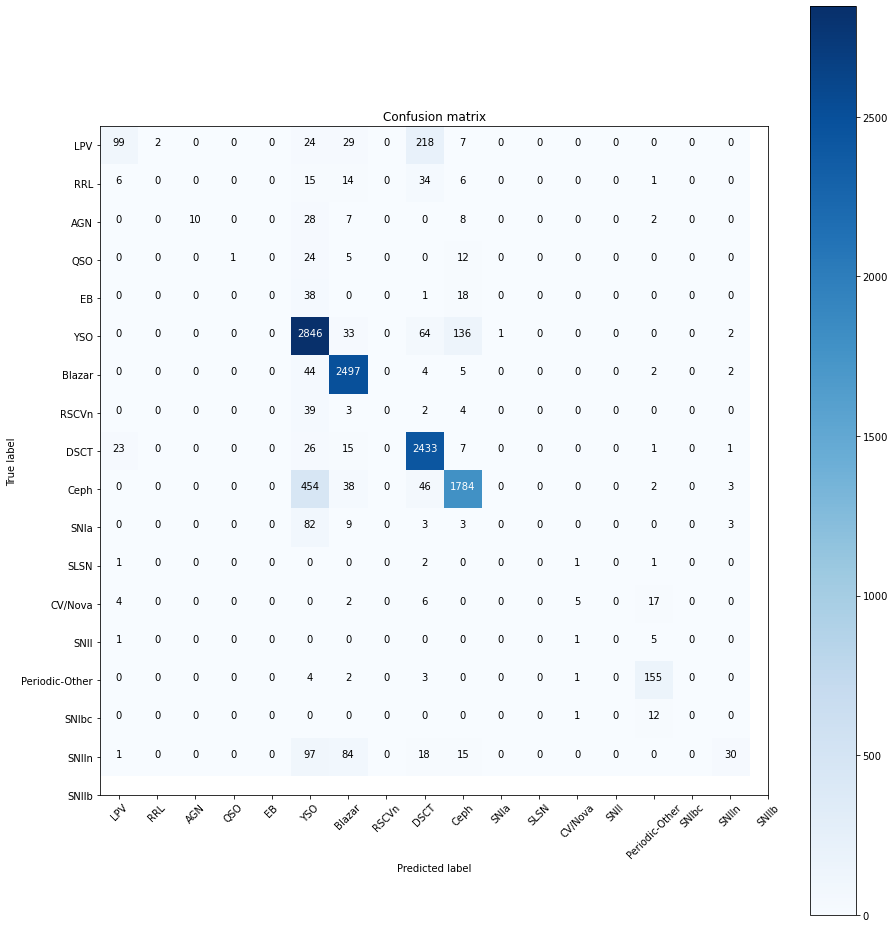

In [426]:
plt.figure(figsize=(13,13))
plot_confusion_matrix(metrics.confusion_matrix(Yencdtest, y2_pred), cc)

We can see that in both cases, it predicts very well a few clases at the center, because they have huge values, but for the other clases there are significant values that are not in the diagonal and the ones on the diagonal are almost zero or classes that are not predicted, so that shows us that the class prediction is not so precise.

DECISION TREE

Accuracy

In [427]:
# Micro Average

metrics.accuracy_score(Yencdtest, y1_pred)

0.8501923899102181

In [428]:
# Macro Average

def macroavg_accuracy(y_true, y_pred):
    all_classes = np.unique(np.append(y_true, y_pred))
    all_class_accuracies = []
    for this_class in all_classes:
        this_class_sensitivity = 0.
        this_class_specificity = 0.

        if sum(y_true == this_class) != 0:
            this_class_sensitivity = \
                float(sum((y_pred == this_class) & (y_true == this_class))) /\
                float(sum((y_true == this_class)))
        if sum(y_true != this_class) != 0:
            this_class_specificity = \
                float(sum((y_pred != this_class) & (y_true != this_class))) /\
                float(sum((y_true != this_class)))
        else: # in rase case, y_true has only 18 classes then specificity should be 18
            this_class_specificity = 18.

        this_class_accuracy = (this_class_sensitivity + this_class_specificity) / 2.
        all_class_accuracies.append(this_class_accuracy)

    return np.mean(all_class_accuracies)

In [429]:
macroavg_accuracy(Yencdtest, y1_pred)

0.6681899562106071

F1 Score

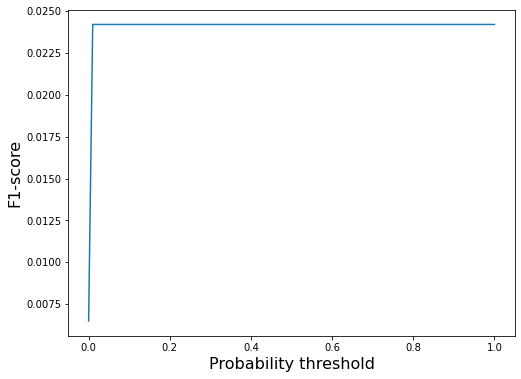

In [430]:
# Micro Average

fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(Yencdtest, y1_pred >= prob, average='micro'), xs))
ax.plot(xs, f1scores)

ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16);

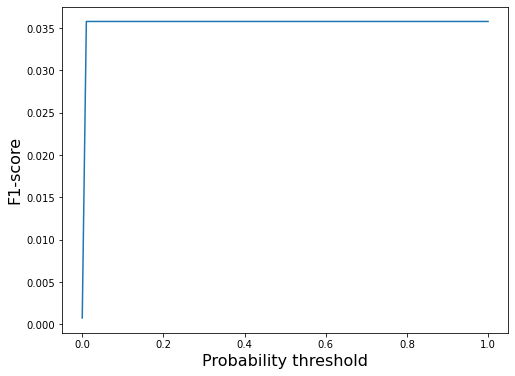

In [431]:
# Macro Average

fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(Yencdtest, y1_pred >= prob, average='macro'), xs))
ax.plot(xs, f1scores)

ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16);

Precision

In [432]:
# Micro Average

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score(Yencdtest, y1_pred, average='micro')

0.8501923899102181

In [433]:
# Macro Average

precision_score(Yencdtest, y1_pred, average='macro')

C:\Users\amrd_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4411804037637268

Recall

In [434]:
# Micro Average

recall_score(Yencdtest, y1_pred, average='micro')

0.8501923899102181

In [435]:
# Macro Average

recall_score(Yencdtest, y1_pred, average='macro')

C:\Users\amrd_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.34670268127109477

KNEIGHBORS CLASSIFIER

Accuracy

In [436]:
# Micro Average

metrics.accuracy_score(Yencdtest, y2_pred)

0.8430953398888413

In [437]:
# Macro Average

macroavg_accuracy(Yencdtest, y2_pred)

0.6503151638147713

F1 Score

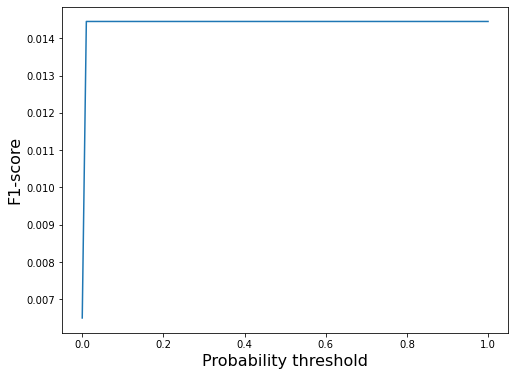

In [438]:
# Micro Average

fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(Yencdtest, y2_pred >= prob, average='micro'), xs))
ax.plot(xs, f1scores)

ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16);

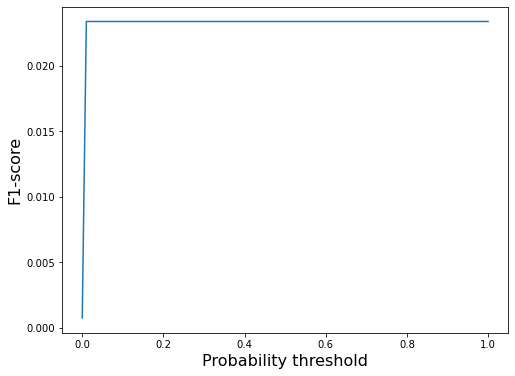

In [439]:
# Macro Average

fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(Yencdtest, y2_pred >= prob, average='macro'), xs))
ax.plot(xs, f1scores)

ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16);

Precision

In [440]:
# Micro Average

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score(Yencdtest, y2_pred, average='micro')

0.8430953398888413

In [441]:
# Macro Average

precision_score(Yencdtest, y2_pred, average='macro')

C:\Users\amrd_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.48403127279640945

Recall

In [442]:
# Micro Average

recall_score(Yencdtest, y2_pred, average='micro')

0.8430953398888413

In [443]:
# Macro Average

recall_score(Yencdtest, y2_pred, average='macro')

0.3126102256832421

### 5. Fixing the Data Imbalance:

In this case, the classifier method choosen is KNeighbors

Method 1: Using SMOTE

In [445]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

X1_resampled, y1_resampled = SMOTE(k_neighbors=4).fit_resample(x_train, Yencdtrain)

Train the Model

In [446]:
ybalancepred1= KNeighborsClassifier(n_neighbors=10).fit(X1_resampled, y1_resampled).predict(x_test)

Confusion Matrix

Confusion matrix, without normalization


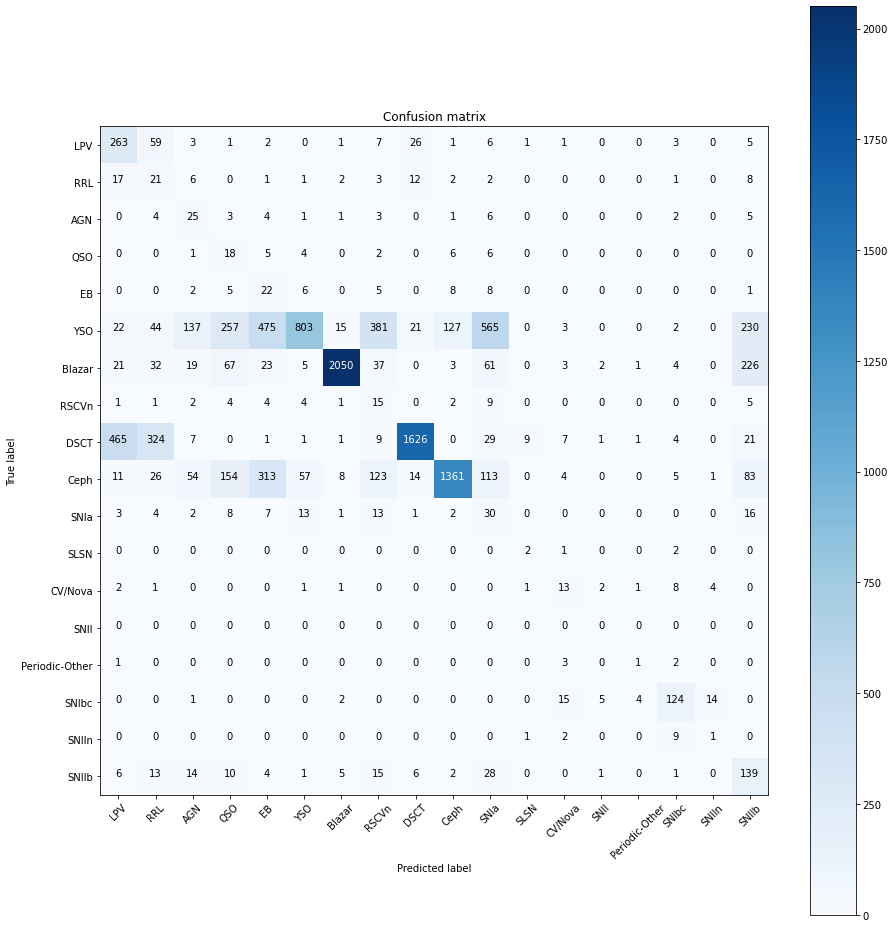

In [447]:
plt.figure(figsize=(13,13))
plot_confusion_matrix(metrics.confusion_matrix(Yencdtest, ybalancepred1), cc)

Method 2: Using ADASYN

In [448]:
from imblearn.over_sampling import ADASYN

X2_resampled, y2_resampled = ADASYN(n_neighbors=4).fit_resample(x_train, Yencdtrain)

Train the Model

In [449]:
ybalancepred2= KNeighborsClassifier(n_neighbors=10).fit(X2_resampled, y2_resampled).predict(x_test)

Confusion Matrix

Confusion matrix, without normalization


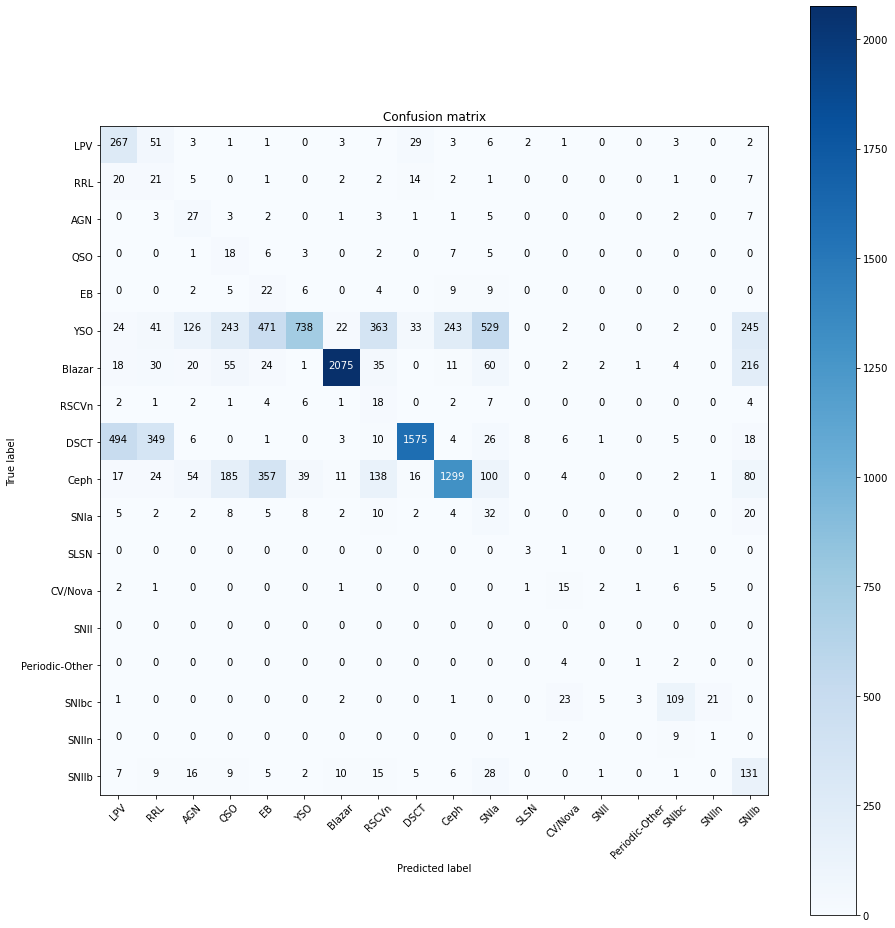

In [450]:
plt.figure(figsize=(13,13))
plot_confusion_matrix(metrics.confusion_matrix(Yencdtest, ybalancepred2), cc)

In this case, we can see in both methods, that compared to the previous confusion matrix without balancing the data that in general there is not a huge improvement in the prediction of the classes but what we can notice is that more classes are better predicted as there are more spaces in or near the diagonal that have increased, but the ones that previously had large numbers, have decreased, so that it predicts more classes a little bit better but not very accurately in general terms. 

I think that a very good metric to measure the rate at which a given class gives an alert is the precision, because is a percentage value or a fraction of correct notification alert as it measures how many of the selected items in the data are relevant to make the classification and, as the data is being balanced, it gives us an idea of the values of how much neighbors are needed to create or modify the data we have in order not to trigger an alert error of the ratio that is being used.